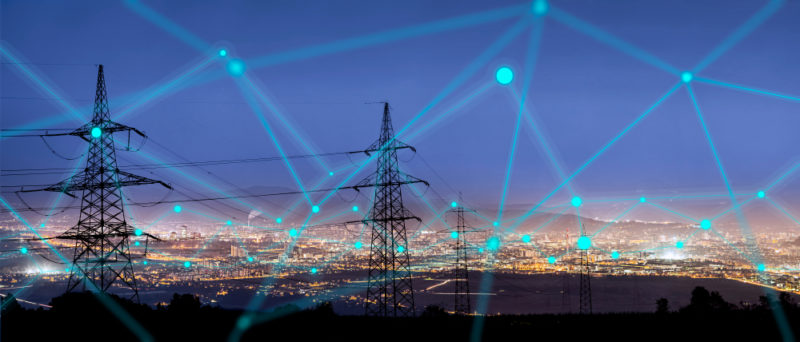

## Power Co. Business Probelm Churn Analysis

We have three datasets about historical and training data from power Co. clients, we need to figure out what features exactly affect the churn rate SME clients, and whether it's price sensitive.









In [2]:
# importing required liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
import plotly.express as px
import plotly.graph_objects as go
import pickle 
%matplotlib inline
# Models Libraries
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
# Importing Data
df1 = pd.read_csv('D:/z/training_data.csv')
hist = pd.read_csv('D:/z/training_hist_data.csv')
result= pd.read_csv('D:/z/training_output.csv')

In [16]:
pd.set_option('max_columns', None)

In [17]:
df1.shape

(16096, 32)

In [18]:
missing_values = pd.DataFrame({"missing values %":df1.isnull().sum() / len(df1.index) * 100 })
missing_values

,missing values %
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


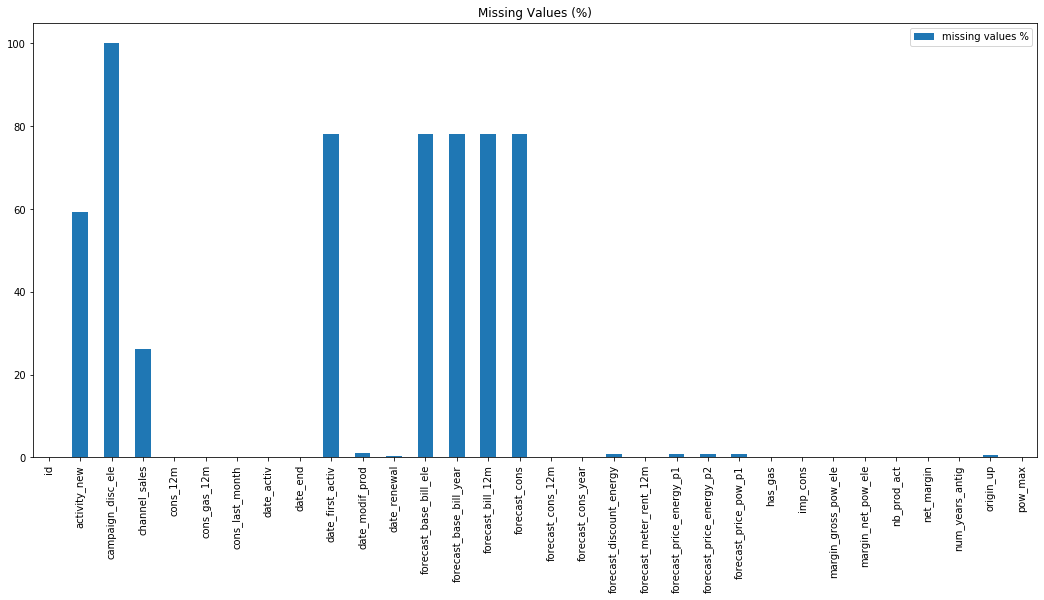

In [7]:
missing_values.plot(kind='bar', figsize=(18,8))
plt.title('Missing Values (%)');

**We are going to drop columns with missing values more than 60%**

In [8]:
df1.drop(['campaign_disc_ele','forecast_base_bill_ele','forecast_base_bill_year','forecast_bill_12m','forecast_cons','date_first_activ'],axis=1,inplace=True)

In [9]:
df1

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000
16092,d0a6f71671571ed83b2645d23af6de00,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16096 entries, 0 to 16095
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   channel_sales             11878 non-null  object 
 3   cons_12m                  16096 non-null  int64  
 4   cons_gas_12m              16096 non-null  int64  
 5   cons_last_month           16096 non-null  int64  
 6   date_activ                16096 non-null  object 
 7   date_end                  16094 non-null  object 
 8   date_modif_prod           15939 non-null  object 
 9   date_renewal              16056 non-null  object 
 10  forecast_cons_12m         16096 non-null  float64
 11  forecast_cons_year        16096 non-null  int64  
 12  forecast_discount_energy  15970 non-null  float64
 13  forecast_meter_rent_12m   16096 non-null  float64
 14  foreca

In [11]:
result.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


In [12]:
# Merging the two dataframes
final = pd.merge(df1,result,on='id')

In [13]:
final.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


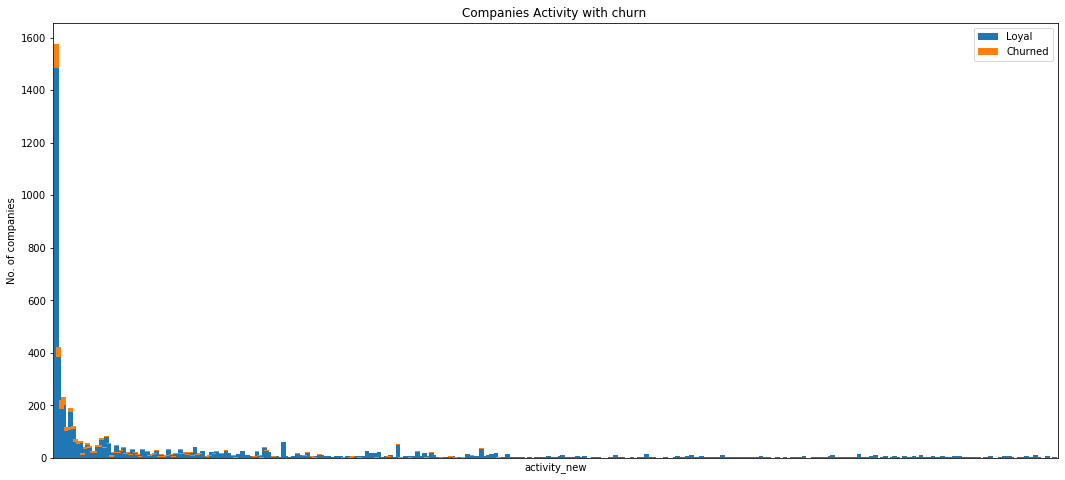

In [19]:
activity = final.groupby([final['activity_new'],final['churn']])['id'].count().unstack(level=1).sort_values(by=[1],ascending=False)
activity.plot(kind='bar',figsize=(18,8),stacked=True,width=2)
plt.xticks([])
plt.legend(['Loyal','Churned'])
plt.ylabel('No. of companies')
plt.title('Companies Activity with churn ');

In [20]:
activity.sort_values(by=[1],ascending=False)

churn,0,1
activity_new,,
apdekpcbwosbxepsfxclislboipuxpop,1484.0,93.0
kkklcdamwfafdcfwofuscwfwadblfmce,384.0,38.0
fmwdwsxillemwbbwelxsampiuwwpcdcb,187.0,32.0
kwuslieomapmswolewpobpplkaooaaew,200.0,30.0
wxemiwkumpibllwklfbcooafckufkdlm,102.0,17.0
...,...,...
xscbuwcbpwsilaeadffielubxpfpmpxw,1.0,NaN
xufxifdsuplwioblexsdedieaowlkcox,8.0,NaN
xumuokeiidieboawuxkidxufcexecbbl,1.0,NaN


##### Obviuosly we cannot conform that activity type will affect the churn rate from this plot . However, it seems right skewed with along tail to the right 

In [22]:
total_activity = activity.fillna(0)[0] + activity.fillna(0)[1]
total_activity

activity_new
apdekpcbwosbxepsfxclislboipuxpop    1577.0
kkklcdamwfafdcfwofuscwfwadblfmce     422.0
fmwdwsxillemwbbwelxsampiuwwpcdcb     219.0
kwuslieomapmswolewpobpplkaooaaew     230.0
wxemiwkumpibllwklfbcooafckufkdlm     119.0
                                     ...  
xscbuwcbpwsilaeadffielubxpfpmpxw       1.0
xufxifdsuplwioblexsdedieaowlkcox       8.0
xumuokeiidieboawuxkidxufcexecbbl       1.0
xwkiacfesppesmilbxkmbmwdopsmslwp       1.0
xwpmxlfwakscmxoiipbcckoabfouxebx       4.0
Length: 419, dtype: float64

In [23]:
churn_percen = activity.fillna(0)[1] / total_activity * 100 

In [24]:
activity_df = pd.DataFrame ({'percentage of Churn':churn_percen,
              'no.of companies':total_activity}).sort_values(by='percentage of Churn',ascending=False).head(10)
activity_df

,percentage of Churn,no.of companies
activity_new,,
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


##### Some activities are belong to only one companies so we can see sometimes 100% churn rate with only one company whivj will be an issue for creatin a model, alot of categories and low number of companies belong to each category.

### Channel sales with Churn 

In [25]:
channel_sales = final.groupby([final['channel_sales'],final['churn']])['churn'].count().unstack(level=1).sort_values(by=[0],ascending=False)
channel_sales

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,NaN
epumfxlbckeskwekxbiuasklxalciiuu,4.0,NaN
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,NaN


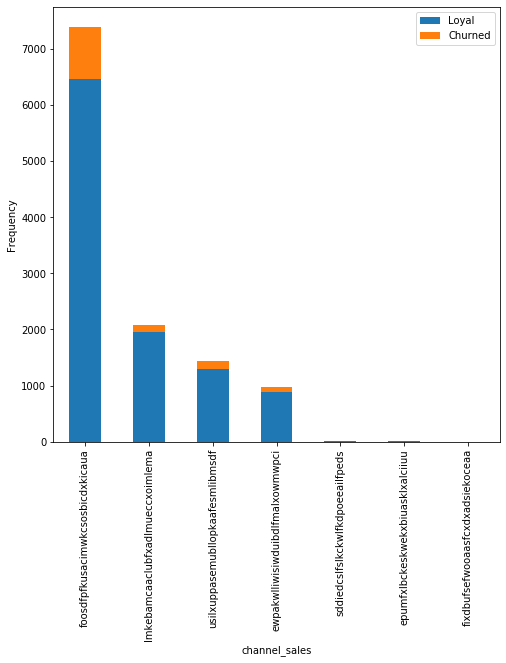

In [36]:
channel_sales.plot(kind='bar',stacked=True,figsize=(8,8))
plt.legend(['Loyal','Churned'])
plt.ylabel('Frequency');

In [27]:
count_sales = final['channel_sales'].value_counts()
count_sales 

foosdfpfkusacimwkcsosbicdxkicaua    7377
lmkebamcaaclubfxadlmueccxoimlema    2073
usilxuppasemubllopkaafesmlibmsdf    1444
ewpakwlliwisiwduibdlfmalxowmwpci     966
sddiedcslfslkckwlfkdpoeeailfpeds      12
epumfxlbckeskwekxbiuasklxalciiuu       4
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

##### We have 7 channel sales with one channel has the most number of companies by 7377 company 

In [28]:
channel=final.groupby([final['channel_sales'],final['churn']])['id'].count().unstack(level=1).sort_values(by=[0],ascending=False)
total_channel = channel[0] + channel[1]
channel_churn_perc = channel[1] / total_channel * 100
channel_churn_perc

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    12.498306
lmkebamcaaclubfxadlmueccxoimlema     5.595755
usilxuppasemubllopkaafesmlibmsdf    10.387812
ewpakwlliwisiwduibdlfmalxowmwpci     8.488613
sddiedcslfslkckwlfkdpoeeailfpeds          NaN
epumfxlbckeskwekxbiuasklxalciiuu          NaN
fixdbufsefwooaasfcxdxadsiekoceaa          NaN
dtype: float64

In [29]:
channel_df = pd.DataFrame(channel_churn_perc,columns=['churn rate']).sort_values(by=['churn rate'],ascending=False)
channel_df

,churn rate
channel_sales,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306
usilxuppasemubllopkaafesmlibmsdf,10.387812
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613
lmkebamcaaclubfxadlmueccxoimlema,5.595755
sddiedcslfslkckwlfkdpoeeailfpeds,NaN
epumfxlbckeskwekxbiuasklxalciiuu,NaN
fixdbufsefwooaasfcxdxadsiekoceaa,NaN


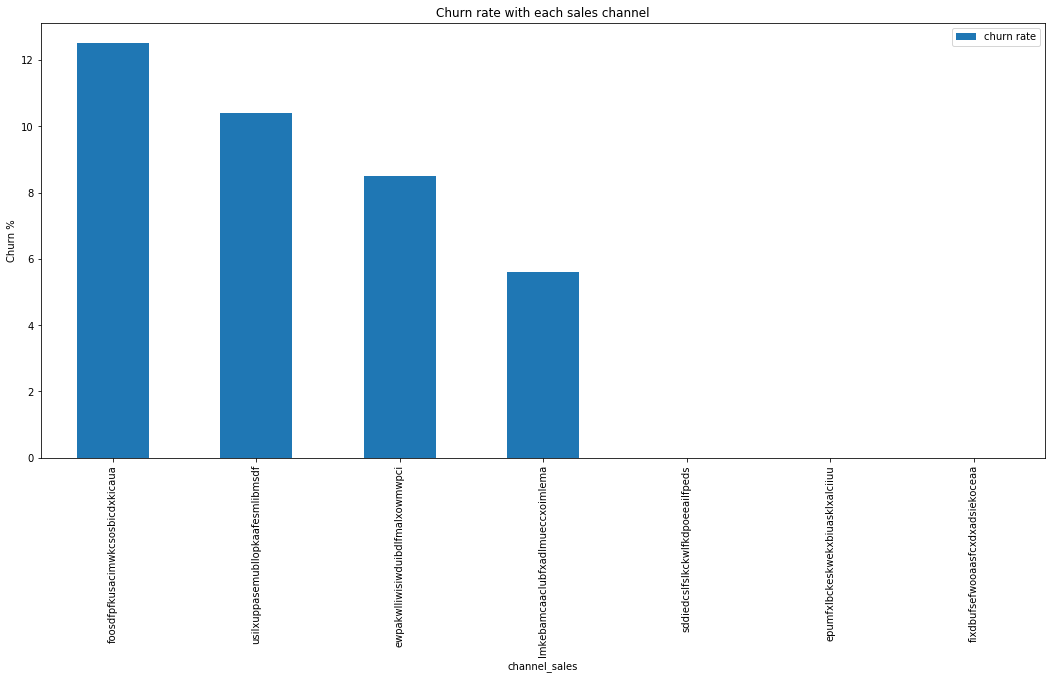

In [30]:
channel_df.plot(kind='bar',figsize=(18,8))
plt.ylabel('Churn %')
plt.title('Churn rate with each sales channel');

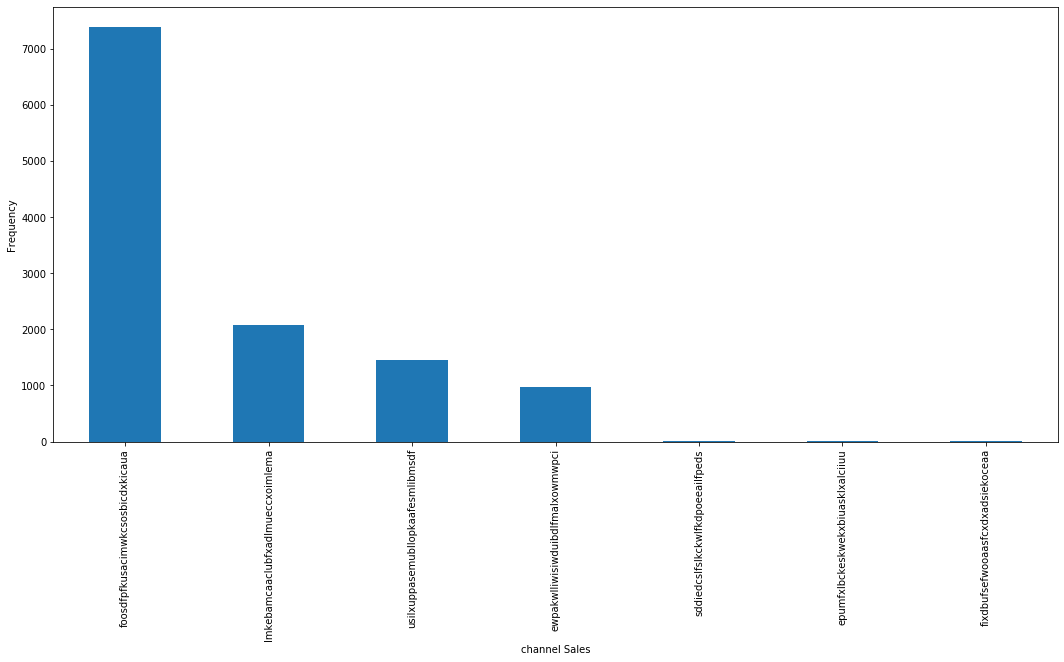

In [31]:
final['channel_sales'].value_counts().plot(kind='bar',figsize=(18,8));
plt.xlabel('channel Sales')
plt.ylabel('Frequency');

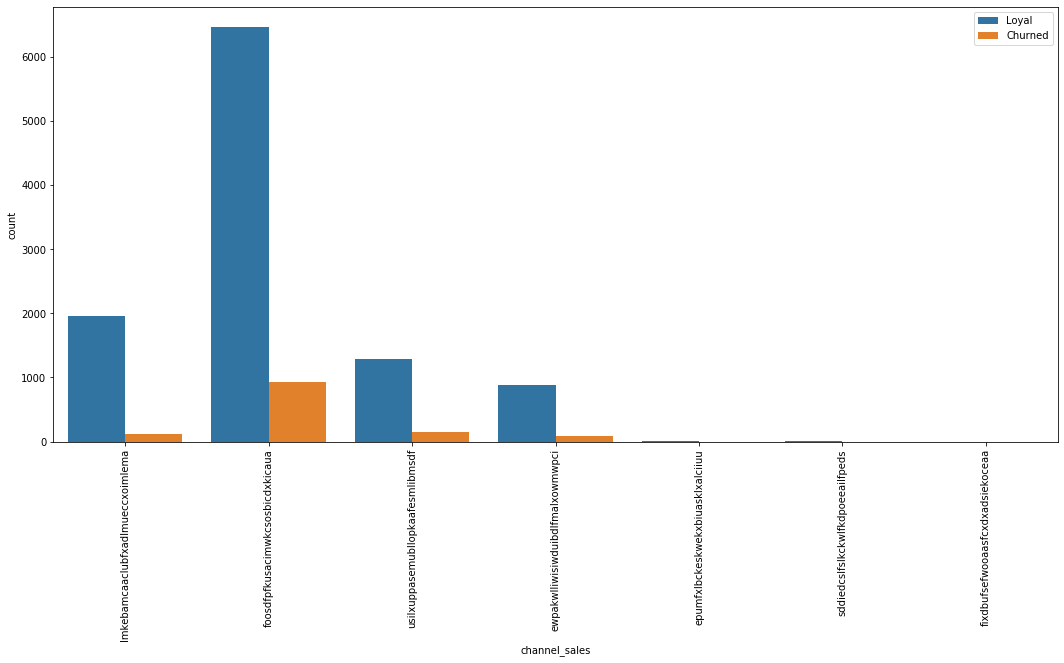

In [32]:
plt.figure(figsize=(18,8))
sns.countplot(data=final,x='channel_sales',hue='churn')
plt.legend(['Loyal','Churned'],loc='upper right')
plt.xticks(rotation=90);


In [33]:
def plot_hist_stack(dataframe,column,ax,bins_=50):
    temp = pd.DataFrame({'Loyal':dataframe[dataframe['churn']==0][column],
                        'Churned':dataframe[dataframe['churn']==1][column]}) 
    temp[['Loyal','Churned']].plot(kind='hist',bins= bins_,ax=ax,stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain',axis='x')

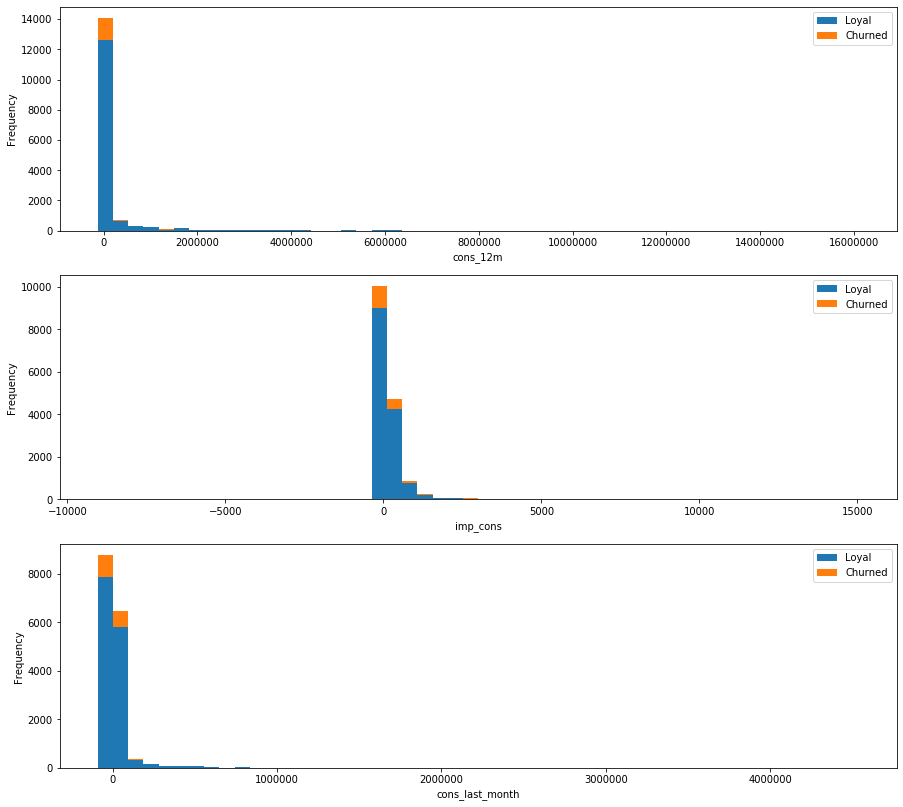

In [34]:
fig, axs = plt.subplots(figsize=(15,14),nrows=3)
plot_hist_stack(final,'cons_12m',axs[0])
plot_hist_stack(final,'imp_cons',axs[1])
plot_hist_stack(final,'cons_last_month',axs[2])


##### we see that the distributions above are right skewed and there are numbers of outliers need to be cleaned

In [196]:
# Creating function for histogram plots 
def plot_hist(dataframe,column,bins_=20,ax=ax):
    plt.hist(data=dataframe,x=column,bins=bins_)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.ticklabel_format(style='plain',axis='x')
    plt.xticks(rotation=90)
    plt.show()

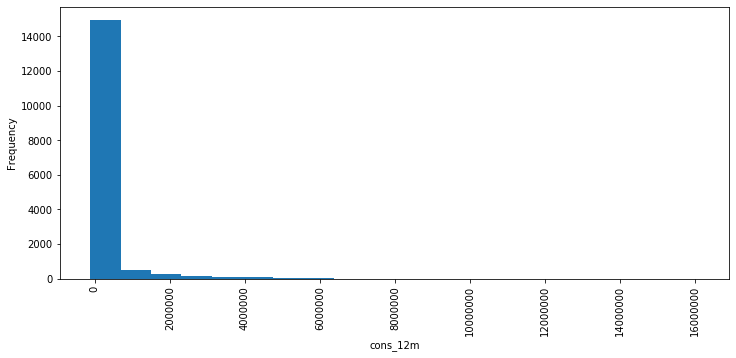

In [39]:
# Plotting general electrical consumption
plt.figure(figsize=(12,5))
plot_hist(final,'cons_12m');

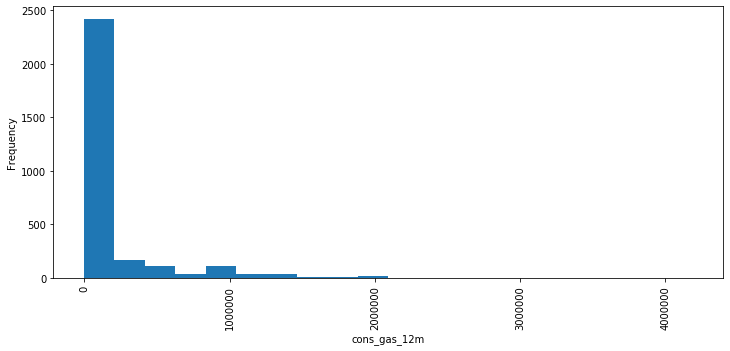

In [40]:
# plotting gas clients only with gas consumption
plt.figure(figsize=(12,5))
plot_hist(final[final['has_gas']=='t'],'cons_gas_12m')

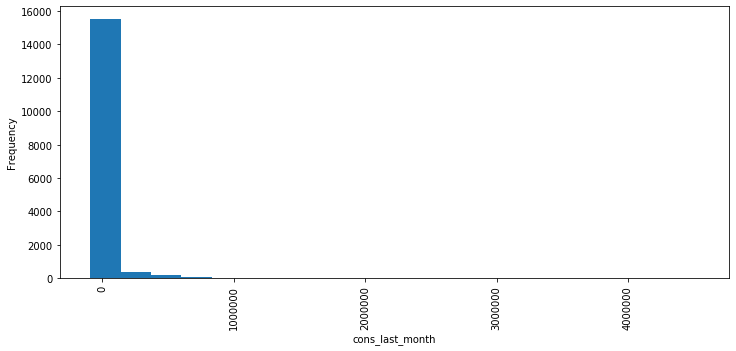

In [41]:
plt.figure(figsize=(12,5))
plot_hist(final,'cons_last_month');

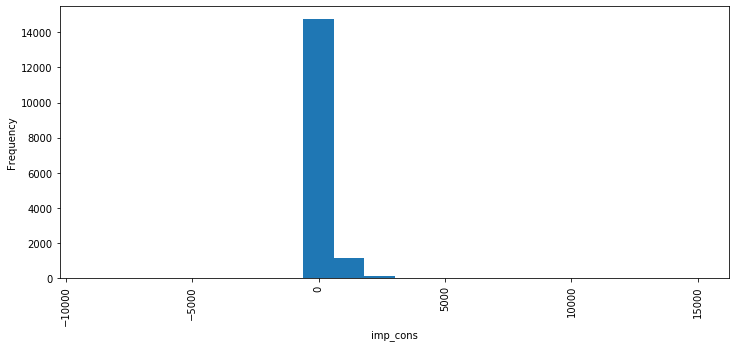

In [42]:
plt.figure(figsize=(12,5))
plot_hist(final,'imp_cons');

##### We can confirm with these histograms the same as we mentioned above skweness and outliers

## Wrangling / Cleaning Data


In [43]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   channel_sales             11878 non-null  object 
 3   cons_12m                  16096 non-null  int64  
 4   cons_gas_12m              16096 non-null  int64  
 5   cons_last_month           16096 non-null  int64  
 6   date_activ                16096 non-null  object 
 7   date_end                  16094 non-null  object 
 8   date_modif_prod           15939 non-null  object 
 9   date_renewal              16056 non-null  object 
 10  forecast_cons_12m         16096 non-null  float64
 11  forecast_cons_year        16096 non-null  int64  
 12  forecast_discount_energy  15970 non-null  float64
 13  forecast_meter_rent_12m   16096 non-null  float64
 14  foreca

In [44]:
# Check duplicated in the dataset 
final.duplicated().any()

False

In [45]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   channel_sales             11878 non-null  object 
 3   cons_12m                  16096 non-null  int64  
 4   cons_gas_12m              16096 non-null  int64  
 5   cons_last_month           16096 non-null  int64  
 6   date_activ                16096 non-null  object 
 7   date_end                  16094 non-null  object 
 8   date_modif_prod           15939 non-null  object 
 9   date_renewal              16056 non-null  object 
 10  forecast_cons_12m         16096 non-null  float64
 11  forecast_cons_year        16096 non-null  int64  
 12  forecast_discount_energy  15970 non-null  float64
 13  forecast_meter_rent_12m   16096 non-null  float64
 14  foreca

### Date Modification

In [46]:
# Converting date columns to date time type 
final['date_end'] = pd.to_datetime(final['date_end'],format='%Y-%m-%d')
final['date_actv'] = pd.to_datetime(final['date_activ'],format='%Y-%m-%d')
final['date_renewal'] = pd.to_datetime(final['date_renewal'],format='%Y-%m-%d')

In [47]:
final.head(2)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,2012-11-07
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2013-06-15


**Since we cannot use median for dates and strings we will get the most frequent date from value counts**

In [48]:
final.loc[final['date_renewal'].isnull(),'date_renewal'] = final['date_renewal'].value_counts().index[0]

In [49]:
final.loc[final['date_modif_prod'].isnull(),'date_modif_prod'] = final['date_modif_prod'].value_counts().index[0]

In [50]:
final.loc[final['date_end'].isnull(),'date_end'] = final['date_end'].value_counts().index[0]

In [51]:
final.loc[final['date_activ'].isnull(),'date_activ'] = final['date_activ'].value_counts().index[0]

In [52]:
# Checking for null values in date columns 
date_renew = final['date_renewal'].isnull().any()
date_end = final['date_end'].isnull().any()
date_activ = final['date_activ'].isnull().any()
date_mod = final['date_modif_prod'].isnull().any()
print(date_renew,date_end,date_activ,date_mod)

False False False False


### Forecast columns

In [53]:
final.head(1)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,0,2012-11-07


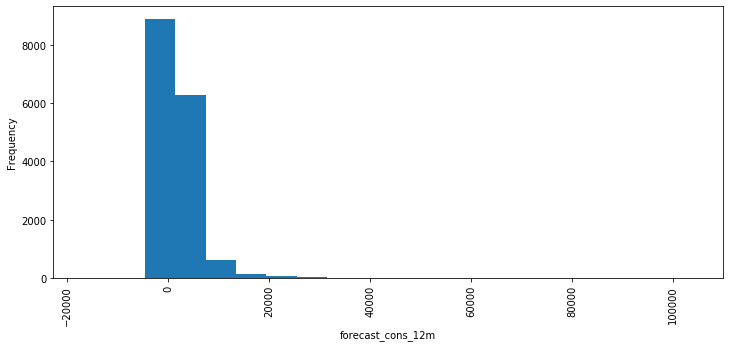

In [54]:
plt.figure(figsize=(12,5))
plot_hist(final,'forecast_cons_12m')

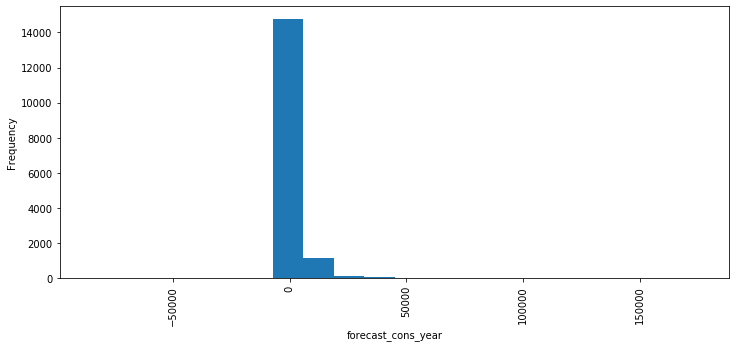

In [55]:
plt.figure(figsize=(12,5))
plot_hist(final,'forecast_cons_year');


C:\Users\muham\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\muham\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


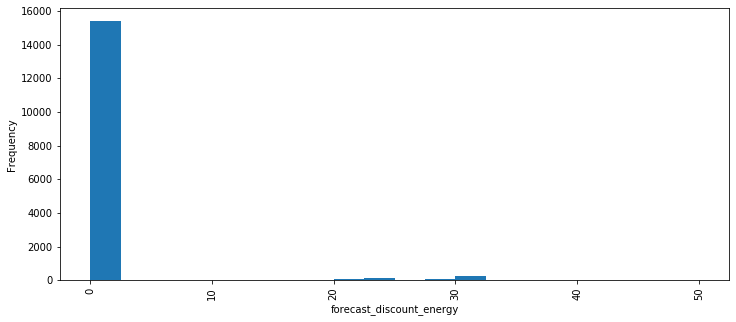

In [56]:
plt.figure(figsize=(12,5))
plot_hist(final,'forecast_discount_energy');


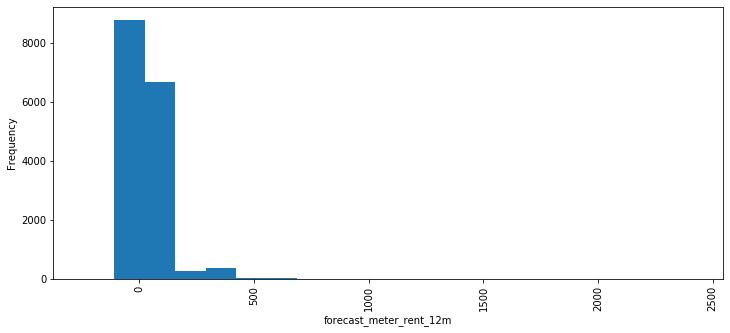

In [57]:
plt.figure(figsize=(12,5))
plot_hist(final,'forecast_meter_rent_12m')

#### we can observe that there are som negative values, we are going to replace the negative values with the mean .

In [58]:
final.loc[final['forecast_cons_12m'] < 0,'forecast_cons_12m'] = final['forecast_cons_12m'].mean()

In [59]:
final.loc[final['forecast_cons_year'] < 0,'forecast_cons_year'] = final['forecast_cons_year'].mean()

In [60]:
final.loc[(final['forecast_discount_energy'] < 0) | (final['forecast_discount_energy'] > 1000 ),'forecast_discount_energy'] = final['forecast_discount_energy'].mean()

In [61]:
final['forecast_discount_energy'].fillna(final['forecast_discount_energy'].mean(),inplace=True)

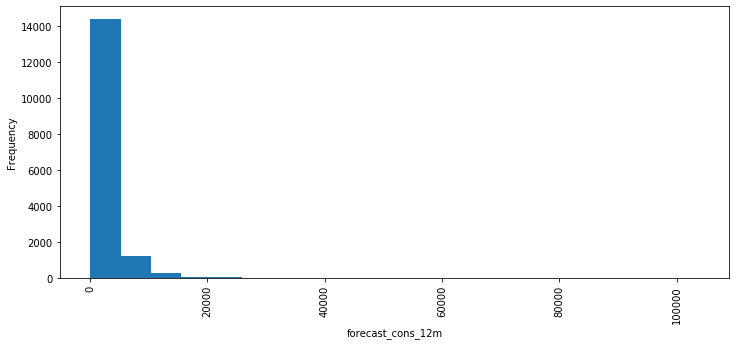

In [62]:
plt.figure(figsize=(12,5))
plot_hist(final,'forecast_cons_12m');

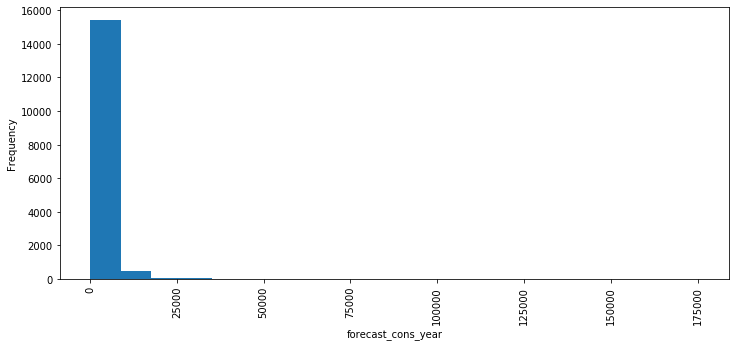

In [63]:
plt.figure(figsize=(12,5))
plot_hist(final,'forecast_cons_year');

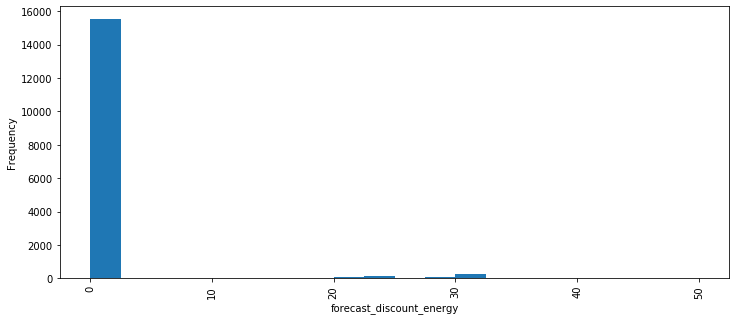

In [64]:
plt.figure(figsize=(12,5))
plot_hist(final,'forecast_discount_energy');

In [65]:
final.head(1)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,10025.0,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,0,2012-11-07


### Price Energy

In [66]:
# Filling missing values of forecasting price by mean values 
final['forecast_price_energy_p1'].fillna(final['forecast_price_energy_p1'].mean(),inplace=True)
final['forecast_price_energy_p2'].fillna(final['forecast_price_energy_p2'].mean(),inplace=True)
final['forecast_price_pow_p1'].fillna(final['forecast_price_pow_p1'].mean(),inplace=True)

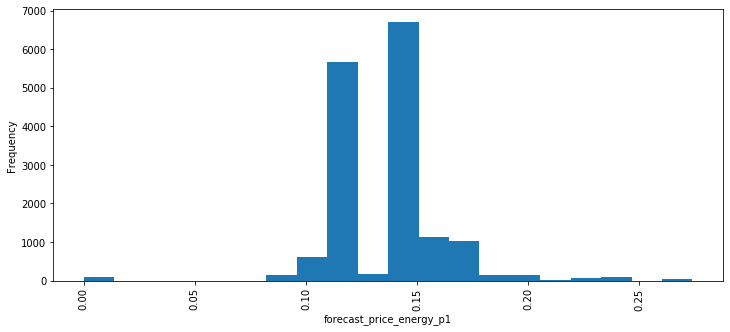

In [67]:
plt.figure(figsize=(12,5))
plot_hist(final,'forecast_price_energy_p1')

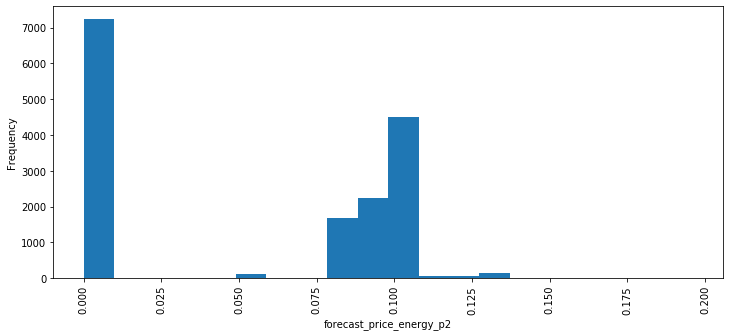

In [68]:
plt.figure(figsize=(12,5))
plot_hist(final,'forecast_price_energy_p2')

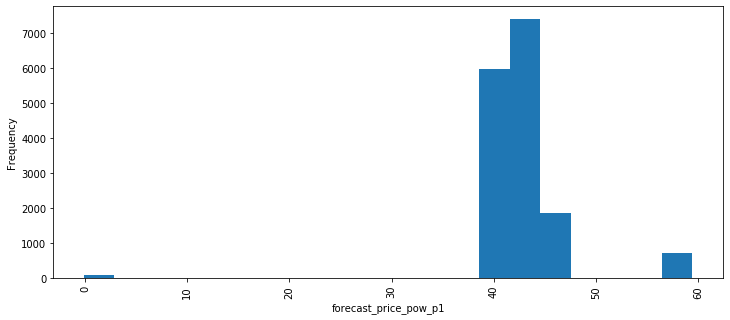

In [69]:
plt.figure(figsize=(12,5))
plot_hist(final,'forecast_price_pow_p1');

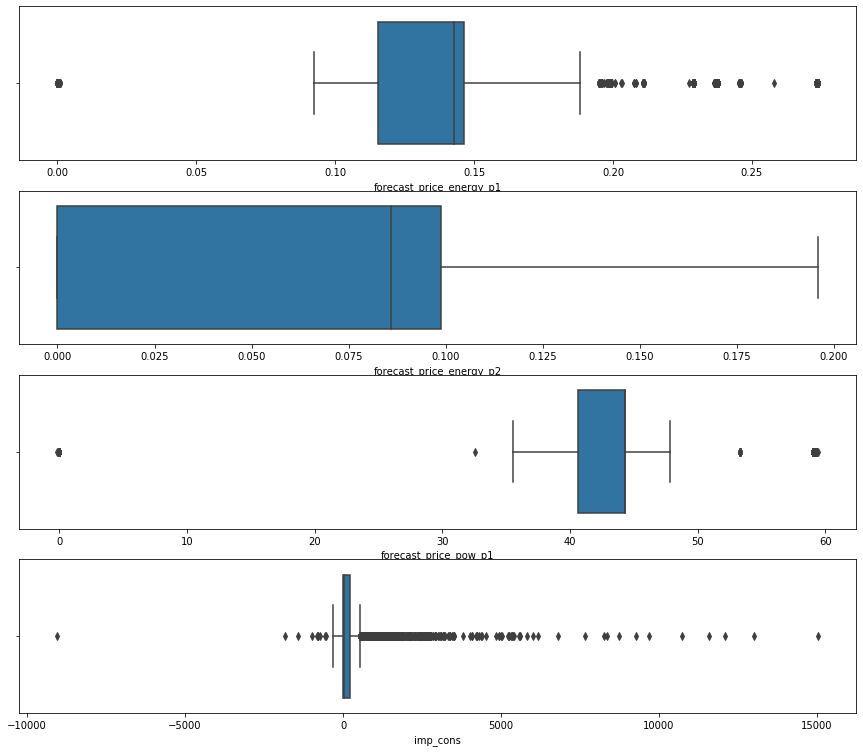

In [70]:
# Plotting boxplots for forecasting price to see the outliers and variance
fig, ax = plt.subplots(figsize=(15,13),nrows=4)
sns.boxplot(data=final,x='forecast_price_energy_p1',ax=ax[0])
sns.boxplot(data=final,x='forecast_price_energy_p2',ax=ax[1])
sns.boxplot(data=final,x='forecast_price_pow_p1',ax=ax[2])
sns.boxplot(data=final,x='imp_cons',ax=ax[3])

In [71]:
final.head(1)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,10025.0,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.0,0,2012-11-07


In [72]:
# removing negative values in current consumption 
final.loc[final['imp_cons']<0,'imp_cons'] = final['imp_cons'].median()

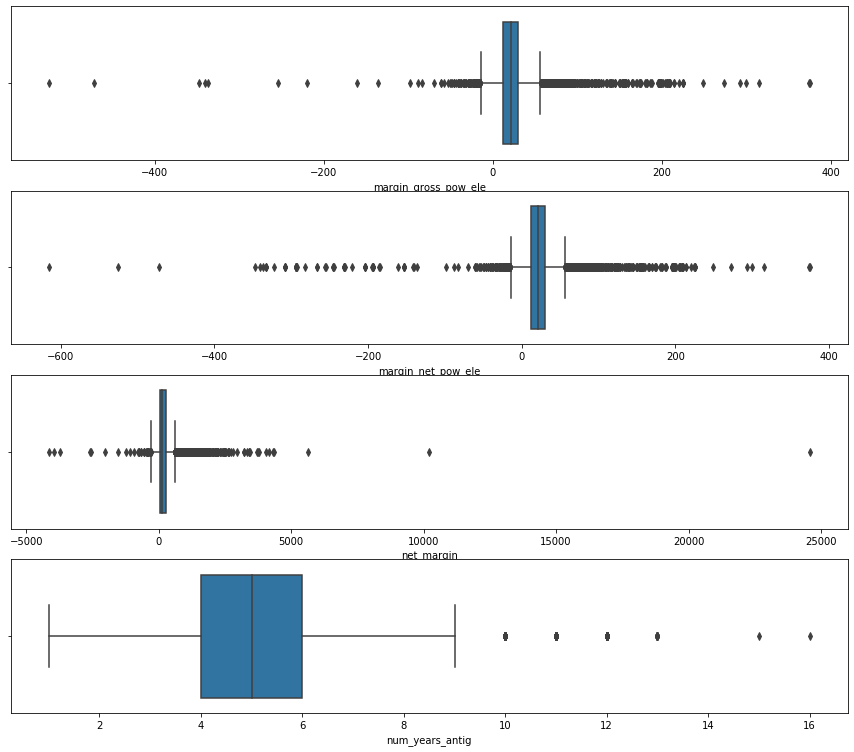

In [73]:
# Plotting boxplots for forecasting price to see the outliers and variance
fig, ax = plt.subplots(figsize=(15,13),nrows=4)
sns.boxplot(data=final,x='margin_gross_pow_ele',ax=ax[0])
sns.boxplot(data=final,x='margin_net_pow_ele',ax=ax[1])
sns.boxplot(data=final,x='net_margin',ax=ax[2])
sns.boxplot(data=final,x='num_years_antig',ax=ax[3])
ax[0].ticklabel_format(style='plain',axis='x')
ax[1].ticklabel_format(style='plain',axis='x')
ax[2].ticklabel_format(style='plain',axis='x')
ax[3].ticklabel_format(style='plain',axis='x')

In [74]:
final.head(2)

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.3,10025.0,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,2012-11-07
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2013-06-15


In [75]:
final.loc[final['margin_gross_pow_ele']<0,'margin_gross_pow_ele'] = final['margin_gross_pow_ele'].median()
final.loc[final['margin_net_pow_ele']<0,'margin_net_pow_ele'] = final['margin_net_pow_ele'].median()
final.loc[final['net_margin']<0,'net_margin'] = final['net_margin'].median()

In [76]:
final['margin_gross_pow_ele'].fillna(final['margin_gross_pow_ele'].mean(),inplace=True)
final['margin_net_pow_ele'].fillna(final['margin_net_pow_ele'].mean(),inplace=True)
final['net_margin'].fillna(final['net_margin'].mean(),inplace=True)

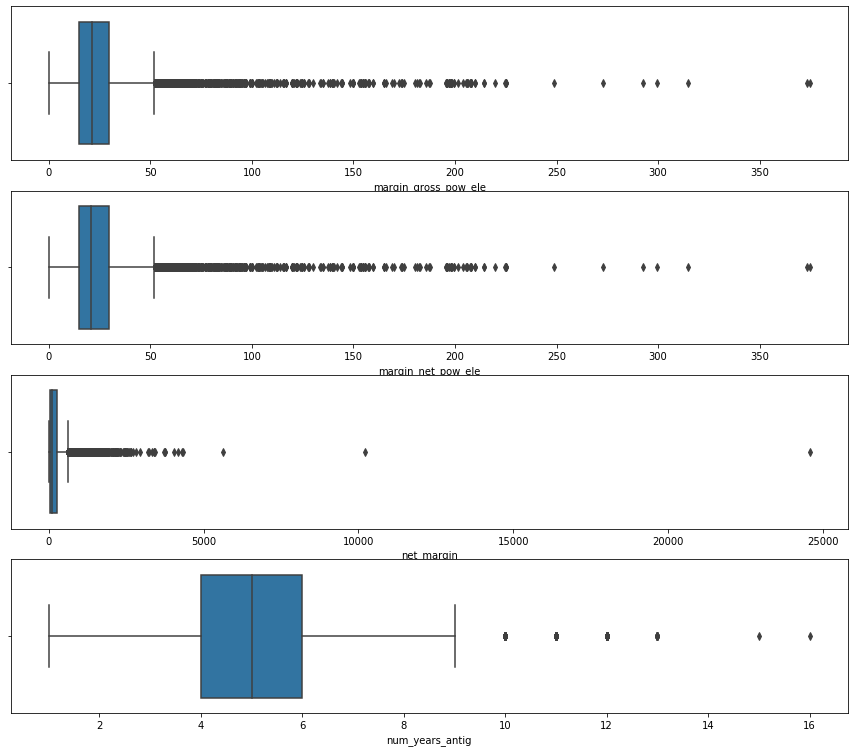

In [77]:
# Plotting boxplots for forecasting price to see the outliers and variance
fig, ax = plt.subplots(figsize=(15,13),nrows=4)
sns.boxplot(data=final,x='margin_gross_pow_ele',ax=ax[0])
sns.boxplot(data=final,x='margin_net_pow_ele',ax=ax[1])
sns.boxplot(data=final,x='net_margin',ax=ax[2])
sns.boxplot(data=final,x='num_years_antig',ax=ax[3])
ax[0].ticklabel_format(style='plain',axis='x')
ax[1].ticklabel_format(style='plain',axis='x')
ax[2].ticklabel_format(style='plain',axis='x')
ax[3].ticklabel_format(style='plain',axis='x')

In [78]:
# filling missing values for origin up and pow max
final.loc[final['origin_up'].isnull(),'origin_up'] = final['origin_up'].value_counts().index[0]
final['pow_max'].fillna(final['pow_max'].mean(),inplace=True)

In [79]:
final.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025.0,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,21.09,20.97,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,2012-11-07
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2013-06-15
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2009-08-21
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2010-04-16
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2010-03-30


## Feature Engineering

In [80]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              6551 non-null   object        
 2   channel_sales             11878 non-null  object        
 3   cons_12m                  16096 non-null  int64         
 4   cons_gas_12m              16096 non-null  int64         
 5   cons_last_month           16096 non-null  int64         
 6   date_activ                16096 non-null  object        
 7   date_end                  16096 non-null  datetime64[ns]
 8   date_modif_prod           16096 non-null  object        
 9   date_renewal              16096 non-null  datetime64[ns]
 10  forecast_cons_12m         16096 non-null  float64       
 11  forecast_cons_year        16096 non-null  float64       
 12  forecast_discount_

In [81]:
# Creating new column providing the difference between active and end contract dates
final['date_diff'] = final['date_end'] - final['date_actv']

In [82]:
final[final['date_diff'].isnull()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv,date_diff


In [83]:
# Convert date difference to integer
final['date_diff'] =(final['date_diff'] /np.timedelta64(1,'D')).astype(int)

In [84]:
final['year'] = pd.DatetimeIndex(final['date_end']).year

In [85]:
final['month'] = pd.DatetimeIndex(final['date_end']).month

In [86]:
final.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv,date_diff,year,month
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025.0,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,21.09,20.97,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,2012-11-07,1460,2016,11
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2013-06-15,1096,2016,6
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2009-08-21,2566,2016,8
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2010-04-16,2192,2016,4
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2010-03-30,2192,2016,3


# Defining new df for 2016 (from Jan to Apr )

In [87]:
final_2016 = final[final['year'] ==2016] 
# final_2016= final_2016.loc[(final_2016['month'] == 1) | (final_2016['month'] == 2) | (final_2016['month'] == 3) | 
#                           (final_2016['month'] == 4)]

In [88]:
final_2016

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv,date_diff,year,month
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025.0,0.0,359.29,0.095919,0.088347,58.995952,f,831.80,21.09,20.97,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,2012-11-07,1460,2016,11
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2013-06-15,1096,2016,6
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2009-08-21,2566,2016,8
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2010-04-16,2192,2016,4
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2010-03-30,2192,2016,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16091,18463073fb097fc0ac5d3e040f356987,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,0.0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,2012-05-24,1445,2016,5
16092,d0a6f71671571ed83b2645d23af6de00,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,181.0,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,2012-08-27,1461,2016,8
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,179.0,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,2012-02-08,1460,2016,2
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,0.0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,2012-08-30,1461,2016,8


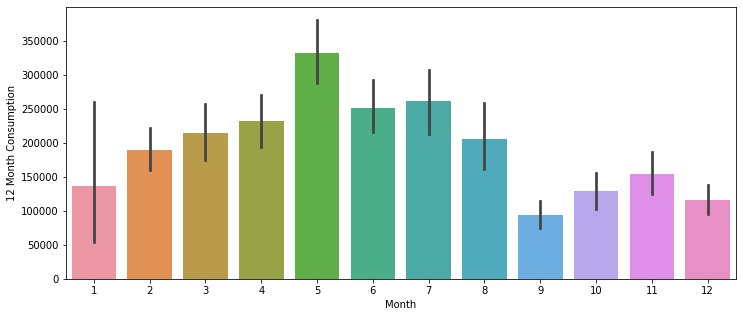

In [89]:
# Plotting Month against Consumption 12 month to see which month has the most consumption in 2016
plt.figure(figsize=(12,5))
sns.barplot(data= final_2016,x= final_2016['month'],y=final_2016['cons_12m'])#, hue = 'churn')
plt.xlabel('Month')
plt.ylabel('12 Month Consumption');


##### We can see that May 2016 has the most electricity consumption  followed by July, and the highest variance is in january 

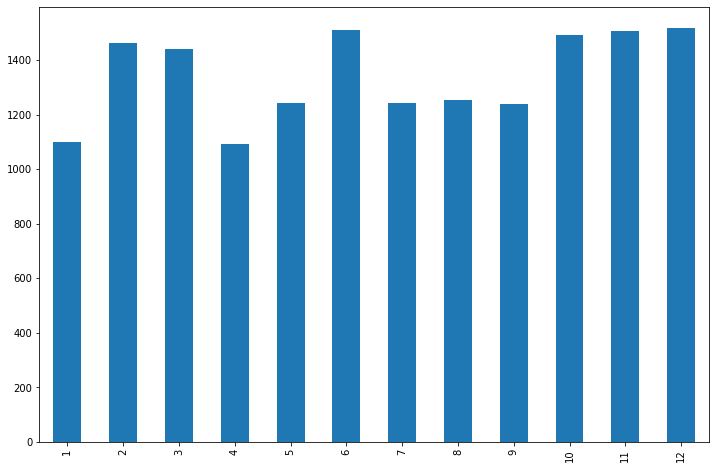

In [90]:
final['month'].value_counts().plot(kind='bar',figsize=(12,8));

##### we can see that 2,3,6,10,11,12 are the most frequent months in the dataset 

In [91]:
def bar_plots(df,title_,size_=(12,5)):
    ax =df.plot(kind='bar',stacked=True,figsize=size_,title=title_)
    plt.ylabel('Company %')
    annotation(ax,textsize=14)
    plt.legend(['loyal','churned'])
    plt.show()
def annotation (ax,pad=0.99, textsize = 13,color='white'):
    for p in ax.patches:
        values = str(round(p.get_height(),1)) 
        if values == '0.0':
            continue
        ax.annotate(values,((p.get_x() + p.get_width()/2)*pad-0.1,(p.get_y() + p.get_height()/2)*pad),color=color,
        size=textsize) 
    
    

In [210]:
month_churn = final.groupby([final['month'],final['churn']])['id'].count().unstack(level=1).sort_values(by=[0],ascending=False)
month_churn.head()

churn,0,1
month,,
12,1390,128
6,1350,161
11,1350,156
10,1341,151
2,1302,159


In [93]:
month_churn_prc = (month_churn.div(month_churn.sum(axis=1),axis=0) * 100).sort_values(by=[0],ascending=False)


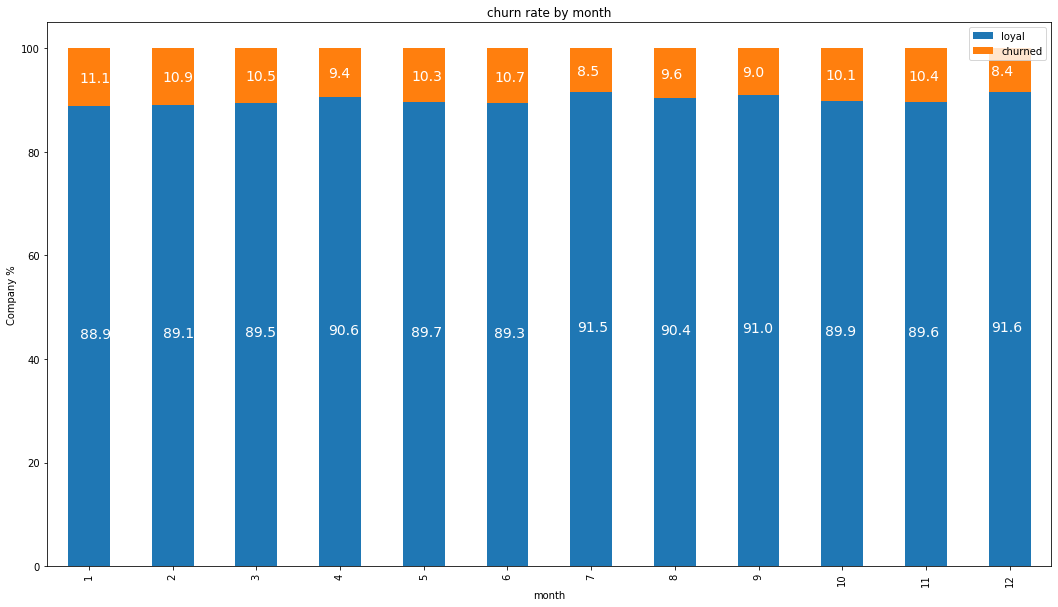

In [94]:
bar_plots(month_churn_prc, 'churn rate by month',(18,10))


##### Obviously highest churn rate was in January 2016 followed by February 

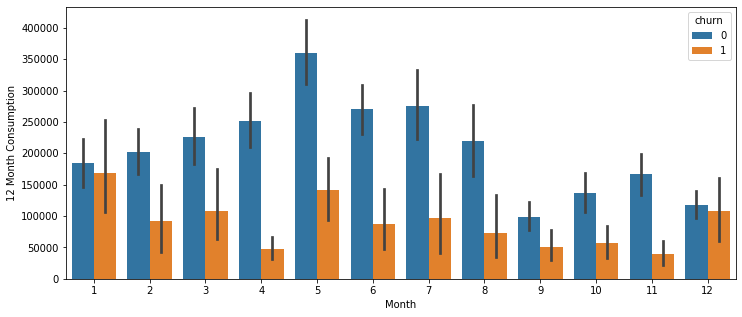

In [95]:
# plotting month with the consumption in 12 m and churn 
plt.figure(figsize=(12,5))
sns.barplot(data= final,x= final['month'],y=final['cons_12m'], hue = 'churn')
plt.xlabel('Month')
plt.ylabel('12 Month Consumption');

##### We can confirm that despite 6,10,11,12 are the most frequent months, May and July has the highest consumption for loyal companies, and January for churned companies 

In [96]:
gas_client = final[final['has_gas']=='t']

In [97]:
gas_churn = gas_client.groupby([gas_client['month'],gas_client['churn']])['id'].count().unstack(level=1).sort_values(by=[0],ascending=False)
gas_churn

churn,0,1
month,,
12,281,16
6,280,29
10,247,12
11,245,19
5,229,14
3,225,25
2,222,28
7,221,21
8,209,21


In [98]:
gas_churn_prc = (gas_churn.div(gas_churn.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

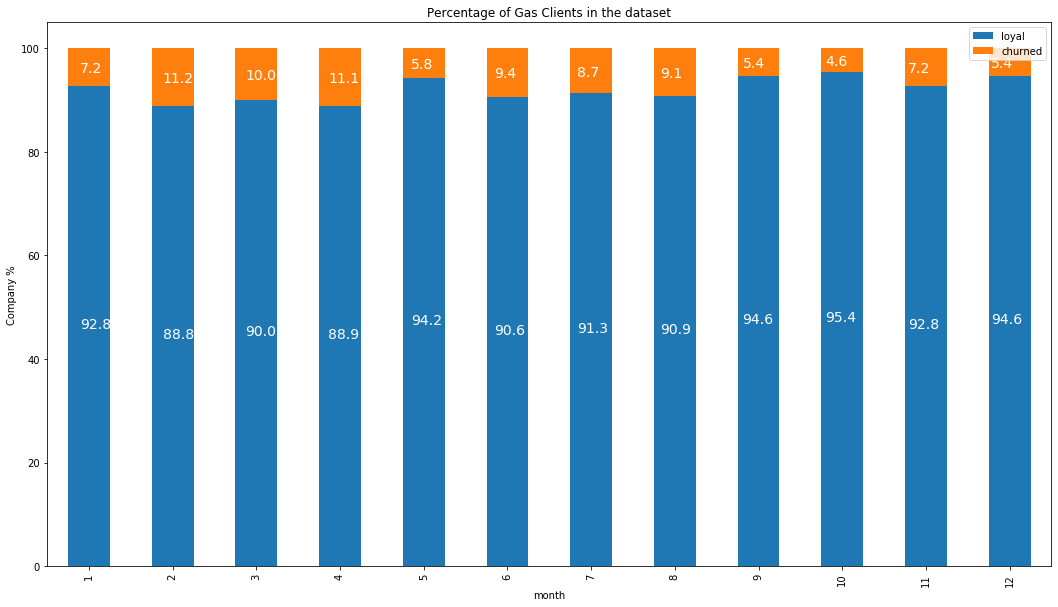

In [99]:
# Determining percentage of Gas companies in the dataset 
bar_plots(gas_churn_prc,'Percentage of Gas Clients in the dataset',(18,10))

#####  we can see that the highest churn rate in gas companies happened in February Then April 

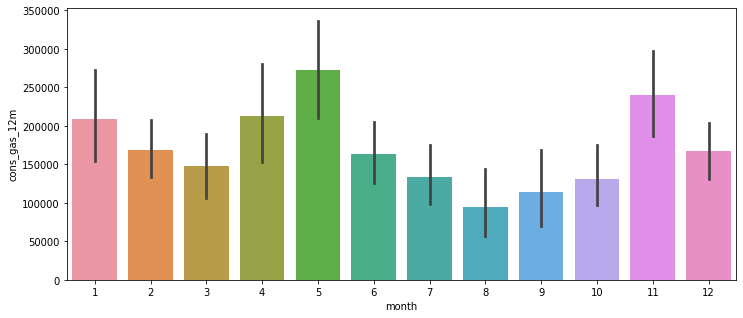

In [100]:
plt.figure(figsize=(12,5))
sns.barplot(data=gas_client,x='month',y='cons_gas_12m');

##### highes gas consumption for gas companies was in May, Nov, and January.

**Churn rate in the dataset**

In [101]:
churn_prop = final[['has_gas','churn']].groupby('churn').count() / final.shape[0]
churn_prop=churn_prop.rename(columns={'has_gas':'churn_prop'})
churn_prop

,churn_prop
churn,
0,0.900907
1,0.099093


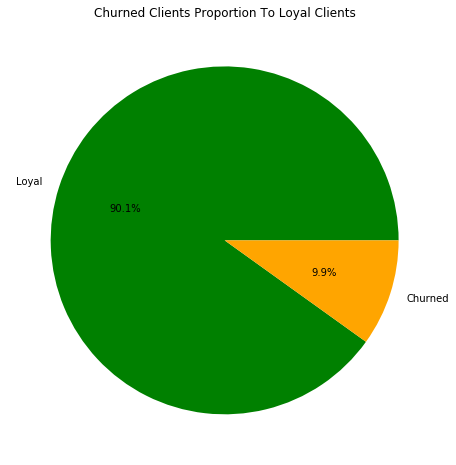

In [102]:
# Determining percentage of churned companies in the dataset 
plt.figure(figsize=(16,8))
plt.pie(churn_prop['churn_prop'],labels = ['Loyal','Churned'],
       autopct='%1.1f%%',
       colors=['g','orange'])
plt.title('Churned Clients Proportion To Loyal Clients');

##### Only 1595 from the whole dataset are churned , around 10% of the clients are churned the remaining 90% are loyal clients

In [103]:
# converting has gas feature to numerical
# final['has_gas'] = final['has_gas'].replace({'t':1,'f':0})

In [104]:
count_gas = final[['has_gas','id']].groupby('has_gas').count()
count_gas

,id
has_gas,
f,13132
t,2964


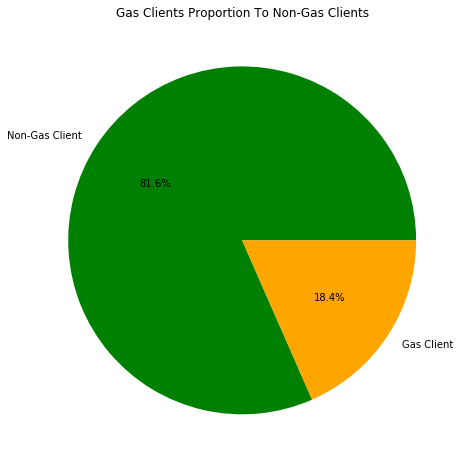

In [105]:
# Determining percentage of gas clients and non gas clients 
plt.figure(figsize=(16,8))
plt.pie(count_gas['id'],labels = ['Non-Gas Client','Gas Client'],
       autopct='%1.1f%%',
       colors=['g','orange'])
plt.title('Gas Clients Proportion To Non-Gas Clients');

In [106]:
has_gas = final[final['has_gas']=='t']

In [107]:
# Churned gas clients 
gas_churned = final.loc[(final['has_gas']=='t')]
gas_churned = gas_churned.loc[(final['churn']== 1)]
gas_churned.shape[0] / has_gas.shape[0]  *100

7.894736842105263

#### Around 8 % of the gas clients have churned

##### Around 10 % of non gas clients have churned 

#####  About 14.5 % of churned clients are gas clients

# Create df for Churned Clients

In [108]:
df_churned = final[final['churn'] == 1]


## Loyal Clients df

In [109]:
df_no_churn = final[final['churn'] == 0]

In [110]:
df_churned.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,date_diff,year,month
count,1.595000e+03,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.0,1595.000000,1595.000000,1595.000000
mean,8.875863e+04,10022.208150,7807.845768,2478.123339,1989.629519,1.180320,77.450871,0.135641,0.056638,43.595802,204.652320,30.260401,29.960784,1.248276,254.876665,4.668966,21.224839,1.0,1881.629467,2016.068966,6.499687
std,2.900448e+05,54312.082719,28919.448358,4449.458557,7143.206382,5.511829,95.641798,0.025273,0.048405,3.944215,639.840209,26.727188,25.600490,0.579709,695.207360,1.604810,20.099010,0.0,601.722662,0.253475,3.506827
min,-1.252760e+05,-617.000000,-11825.000000,0.000000,0.000000,0.000000,-0.500000,0.092453,0.000000,32.583108,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.300000,1.0,979.000000,2016.000000,1.000000
25%,5.836000e+03,0.000000,0.000000,506.915000,0.000000,0.000000,16.300000,0.115237,0.000000,40.606701,0.000000,18.100000,18.120000,1.000000,54.780000,4.000000,13.150000,1.0,1461.000000,2016.000000,3.000000
50%,1.513400e+04,0.000000,747.000000,1199.370000,365.000000,0.000000,23.300000,0.141434,0.087381,44.311378,43.570000,25.840000,25.800000,1.000000,129.320000,4.000000,14.490000,1.0,1827.000000,2016.000000,6.000000
75%,4.620250e+04,0.000000,3471.000000,2760.105000,1913.673615,0.000000,132.120000,0.145711,0.099086,44.311378,211.355000,34.500000,34.440000,1.000000,297.545000,6.000000,20.700000,1.0,2192.000000,2016.000000,10.000000
max,4.012564e+06,828344.000000,469898.000000,66521.260000,155432.000000,30.000000,2411.690000,0.273963,0.168092,59.266378,13001.820000,299.640000,299.640000,5.000000,24570.650000,13.000000,320.000000,1.0,4749.000000,2017.000000,12.000000


In [111]:
df_no_churn.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn,date_diff,year,month
count,1.450100e+04,1.450100e+04,1.450100e+04,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.000000,14501.0,14501.000000,14501.000000,14501.000000
mean,2.064686e+05,3.431931e+04,2.074335e+04,2370.581192,1914.112654,0.970783,69.524497,0.135929,0.052545,43.526643,196.620561,23.907760,23.752410,1.358734,217.471819,5.070409,20.535857,0.0,2033.097442,2016.059927,6.702365
std,7.084568e+05,1.860753e+05,8.614061e+04,3976.022532,4944.444013,5.098036,76.940134,0.026245,0.048414,5.311240,468.402379,19.695978,19.083651,1.525549,298.641633,1.679062,21.946038,0.0,628.233817,0.254467,3.482423
min,-1.169570e+05,-3.037000e+03,-9.138600e+04,0.000000,0.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,365.000000,2006.000000,1.000000
25%,5.918000e+03,0.000000e+00,0.000000e+00,520.820000,0.000000,0.000000,16.220000,0.115237,0.000000,40.606701,0.000000,14.640000,14.640000,1.000000,53.270000,4.000000,12.500000,0.0,1461.000000,2016.000000,4.000000
50%,1.536600e+04,0.000000e+00,9.250000e+02,1186.960000,389.000000,0.000000,19.380000,0.142881,0.085553,44.311378,44.750000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.0,1957.000000,2016.000000,7.000000
75%,5.066200e+04,0.000000e+00,4.209000e+03,2687.160000,2004.000000,0.000000,131.420000,0.146348,0.098837,44.311378,219.100000,28.600000,28.560000,1.000000,273.000000,6.000000,19.800000,0.0,2469.000000,2016.000000,10.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,1052.390000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,10203.500000,16.000000,500.000000,0.0,5925.000000,2017.000000,12.000000


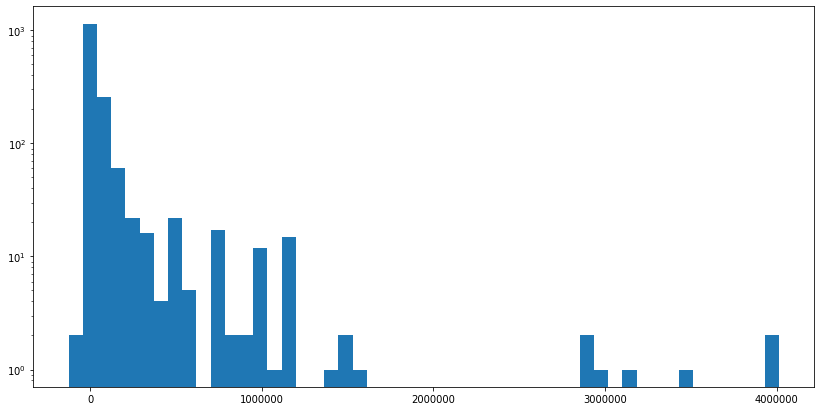

In [112]:
plt.figure(figsize=(14,7))
plt.hist(data=df_churned,x='cons_12m',bins =50)
plt.yscale('log')

##### Electrical consumption for Churned clients fall between 0 and 50000 kw of electricity 

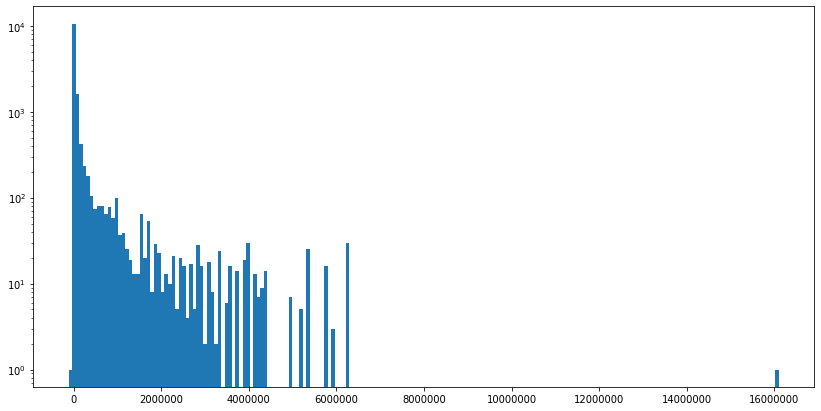

In [113]:
plt.figure(figsize=(14,7))
plt.hist(data=df_no_churn,x='cons_12m',bins =200)
plt.yscale('log')
plt.ticklabel_format(style='plain',axis='x')

##### we can see that electrical consumption for loyal companies much more than for companies that have been churned 

In [114]:
 df_churned.imp_cons.mean()

204.65231974921625

In [115]:
df_no_churn.imp_cons.mean()

196.62056099579272

##### We observed that the average current paid consumption for churned clients are higher than paid consumption for loyal clients

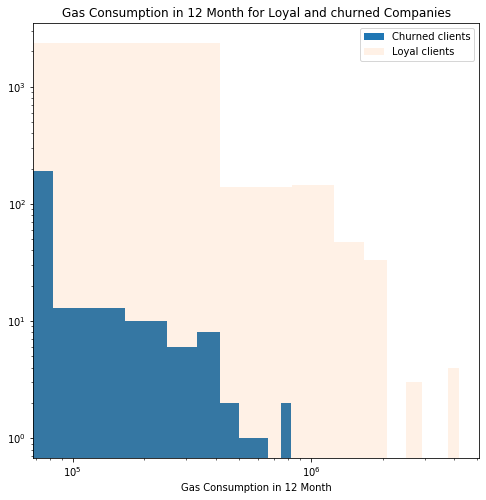

In [116]:
figure, ax = plt.subplots(figsize=(8,8))
ax.hist( df_churned[df_churned['has_gas']=='t']['cons_gas_12m'],label='Churned clients', alpha = 1)
ax.hist( df_no_churn[df_no_churn['has_gas']=='t']['cons_gas_12m'],label='Loyal clients',alpha = 0.1);
plt.xscale('log')
plt.yscale('log')
ax.legend()
plt.xlabel('Gas Consumption in 12 Month')
plt.title('Gas Consumption in 12 Month for Loyal and churned Companies');


##### we can conform that gas consumption for loay higher than for churned companies 

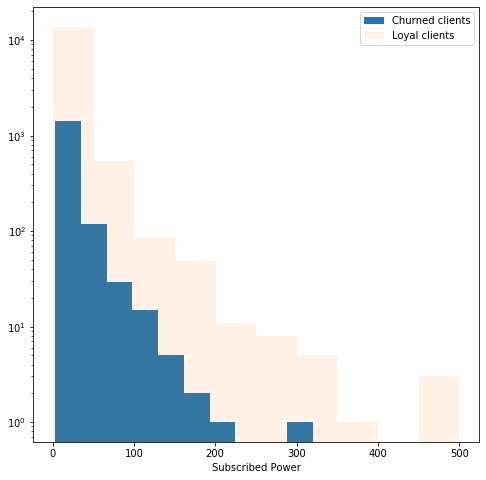

In [117]:
figure, ax = plt.subplots(figsize=(8,8))
ax.hist( df_churned['pow_max'],label='Churned clients', alpha = 1)
ax.hist( df_no_churn['pow_max'],label='Loyal clients',alpha = 0.1);
# plt.xscale('log')
plt.yscale('log')
ax.legend()
plt.xlabel('Subscribed Power');

##### Loyal clients have higher subscribed power than churned clients 

### Price for first and second periods for churned and loyal clients 

In [118]:
final.head()

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv,date_diff,year,month
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025.0,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,21.09,20.97,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,2012-11-07,1460,2016,11
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2013-06-15,1096,2016,6
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2009-08-21,2566,2016,8
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2010-04-16,2192,2016,4
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2010-03-30,2192,2016,3


In [119]:
antig_churn = final.groupby([final['num_years_antig'],final['churn']])['id'].count().unstack(level=1)

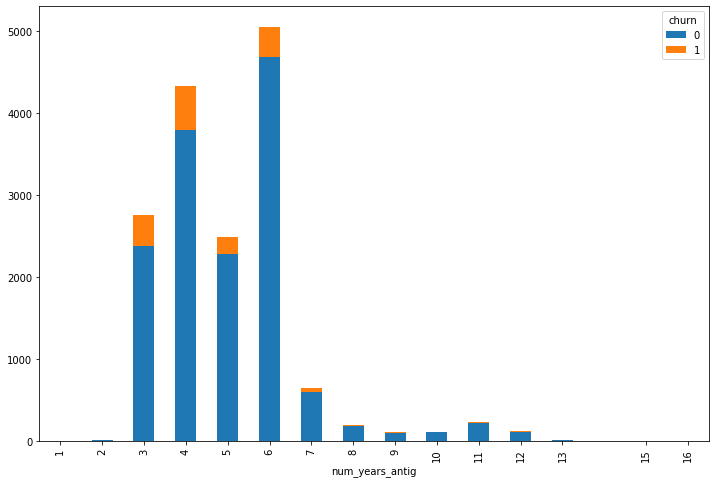

In [120]:
antig_churn.plot(kind='bar',stacked=True,figsize=(12,8));

In [121]:
final['num_years_antig'].value_counts()

6     5054
4     4331
3     2757
5     2495
7      648
11     236
8      202
12     127
10     113
9      106
13      13
2       11
16       1
1        1
15       1
Name: num_years_antig, dtype: int64

##### We can see that 6 years and 4 years client antiquity are the most frequent , and the highest churn falls in recent clients and high antiquity 

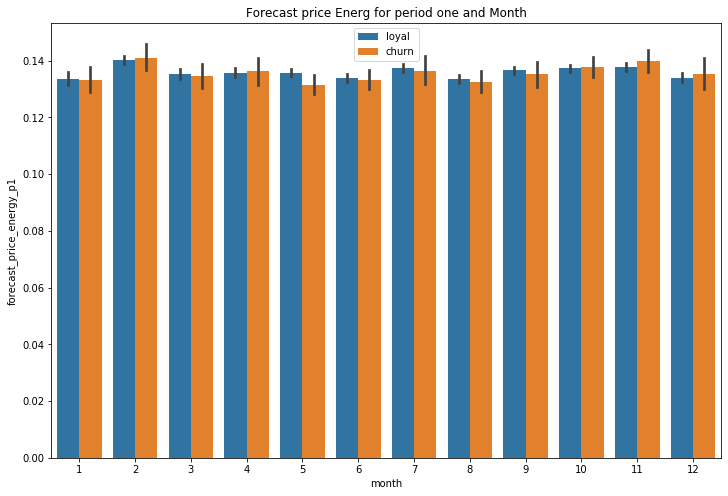

In [122]:
plt.figure(figsize=(12,8))
labels=['loyal','churn']
ax = sns.barplot(data=final,x='month',y='forecast_price_energy_p1',hue='churn')
ax.set_title('Forecast price Energ for period one and Month')
a, d  = ax.get_legend_handles_labels()
ax.legend(a,labels);


#### we can see that February has the highest price in the first period, and we got that gas and non gas companies highest churn rate was January and February 

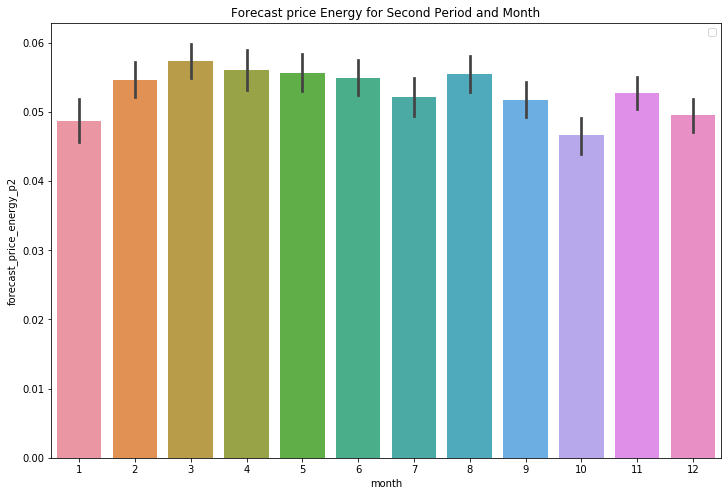

In [123]:
plt.figure(figsize=(12,8))
labels=['loyal','churn']
ax = sns.barplot(data=final,x='month',y='forecast_price_energy_p2')
ax.set_title('Forecast price Energy for Second Period and Month')
a, d  = ax.get_legend_handles_labels()
ax.legend(a,labels);

##### Price range in the second period has decreased  from the first period  with March and August with highest price 

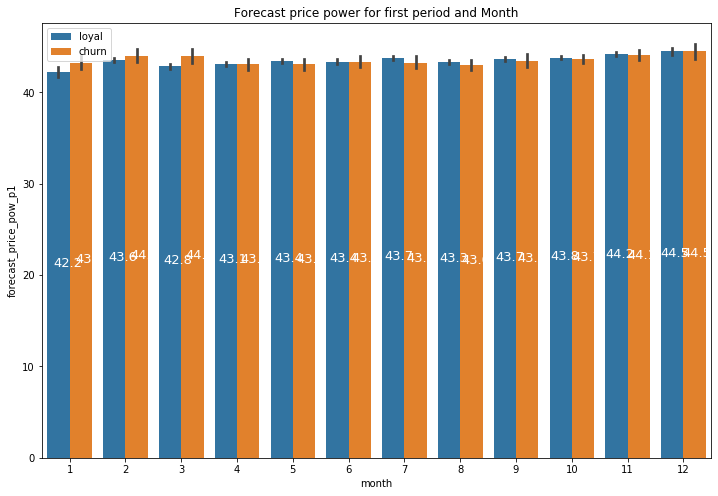

In [124]:
plt.figure(figsize=(12,8))
labels=['loyal','churn']
ax = sns.barplot(data=final,x='month',y='forecast_price_pow_p1',hue='churn')
ax.set_title('Forecast price power for first period and Month')
a, d  = ax.get_legend_handles_labels()
ax.legend(a,labels);
for p in ax.patches:
        values = str(round(p.get_height(),1)) 
        if values == '0.0':
            continue
        ax.annotate(values,((p.get_x() + p.get_width()/2)*0.99-0.1,(p.get_y() + p.get_height()/2)*0.99),color='white',
        size=13)
    

##### we can see that the highest power price in the first period in Dec, Nov, Oct, July, and Feb

##### We can observe that churned clients forcasetd power price higher than loyal clients in Jan, Feb, and March

## Analysis with Gas and Non Gas Clients 

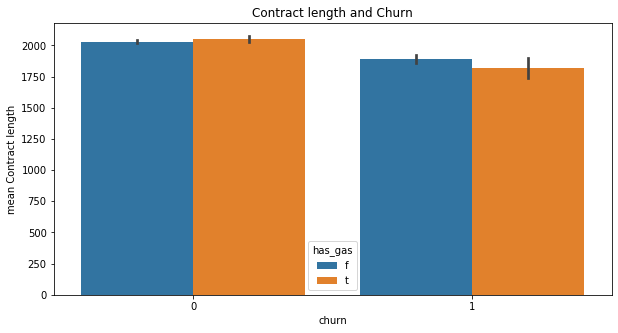

In [125]:
plt.figure(figsize=(10,5))
sns.barplot(data= final, x='churn', y='date_diff',hue='has_gas')
plt.title('Contract length and Churn')
plt.ylabel('mean Contract length');

#### from the above barplot we can see that loyal companies have higher mean contract period  than churned clients
##### loyal Gas clients have slightly highest contract duration than non-gas clients.
##### churned gas clients have lowest contract duration than non-gas clients

In [126]:
final['forecast_discount_energy']=final['forecast_discount_energy'].apply (int)

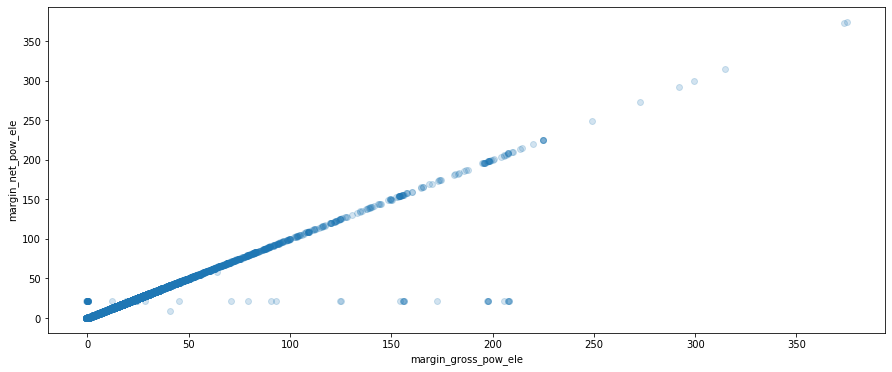

In [127]:
# Relationship between margin gross and margin net power electricity
plt.figure(figsize=(15,6))
base_color = sns.color_palette()[0]
sns.regplot(data=final,x='margin_gross_pow_ele',y='margin_net_pow_ele',color=base_color,fit_reg=False,x_jitter=.6,scatter_kws={'alpha':0.2});

##### we can see the positive direct relationship between gross and net margins

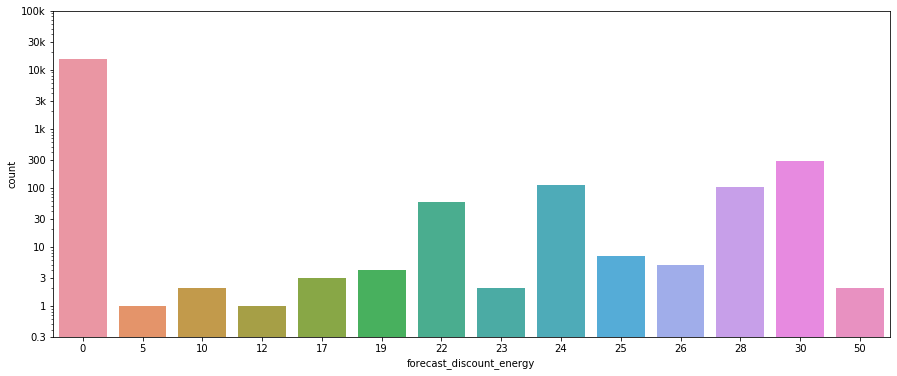

In [128]:
plt.figure(figsize=(15,6))
sns.countplot(data=final,x='forecast_discount_energy');
#plt.xticks([0, 10, 20], ['0','10','20']);
plt.yscale('log')
plt.yticks([0.3,1,3,10, 30, 100, 300, 1000,3000,10000,30000,100000], ['0.3','1','3','10','30','100','300', '1k','3k', '10k', '30k', '100k']);

###### Most of clients got no discount at all, followed by companies that got 30% discount and churned 

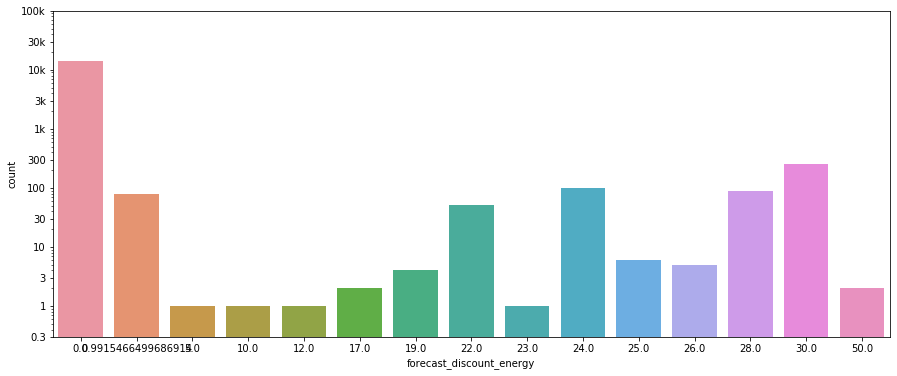

In [129]:
# Forecasted discount for Loyal clients
plt.figure(figsize=(15,6))
sns.countplot(data=df_no_churn,x='forecast_discount_energy');
#plt.xticks([0, 10, 20], ['0','10','20']);
plt.yscale('log')
plt.yticks([0.3,1,3,10, 30, 100, 300, 1000,3000,10000,30000,100000], ['0.3','1','3','10','30','100','300', '1k','3k', '10k', '30k', '100k']);

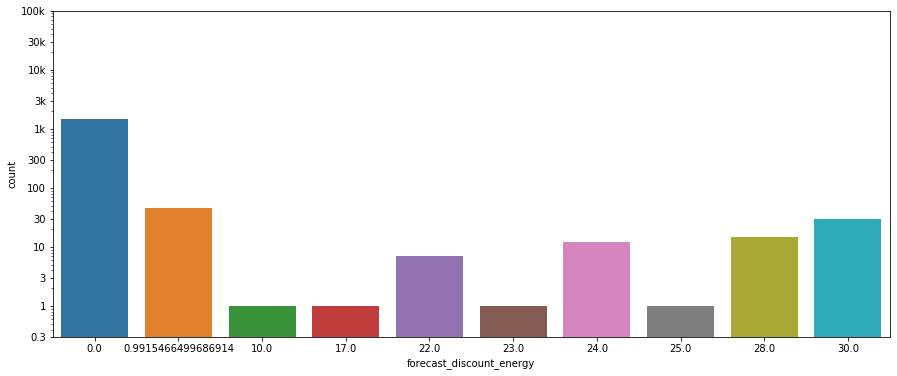

In [130]:
# Forecasted discount for churned clients
plt.figure(figsize=(15,6))
sns.countplot(data=df_churned,x='forecast_discount_energy');
#plt.xticks([0, 10, 20], ['0','10','20']);
plt.yscale('log')
plt.yticks([0.3,1,3,10, 30, 100, 300, 1000,3000,10000,30000,100000], ['0.3','1','3','10','30','100','300', '1k','3k', '10k', '30k', '100k']);

##### Obviously most of the churned clients doesn't get discounts, and maximum discount was 30 unlike loyal clients whose got discounts to 50 
##### which may lead to that maube our churned clients are price sensitive

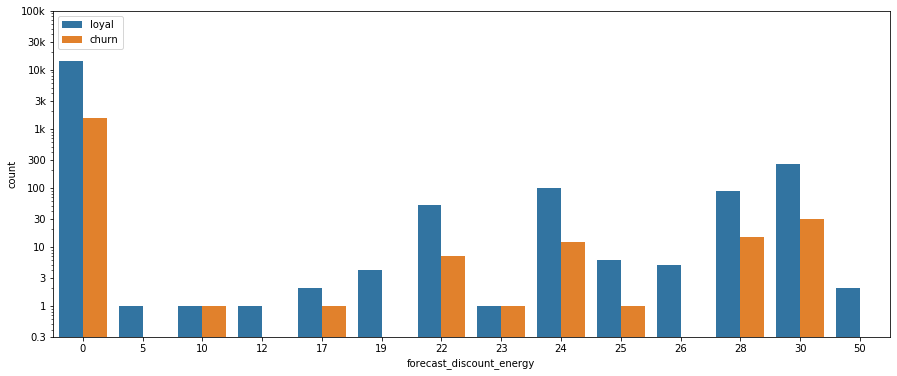

In [131]:
# Countplot showing the churned clients count with different discounts 
plt.figure(figsize=(15,6))
ax = sns.countplot(data=final,x='forecast_discount_energy',hue='churn');
#plt.xticks([0, 10, 20], ['0','10','20']);
plt.yscale('log')
plt.yticks([0.3,1,3,10, 30, 100, 300, 1000,3000,10000,30000,100000], ['0.3','1','3','10','30','100','300', '1k','3k', '10k', '30k', '100k']);
labels=['loyal','churn']
a, d  = ax.get_legend_handles_labels()
ax.legend(a,labels);


##### most of churned clients churned at zero discounts and 30% discounts least at 10, 25%


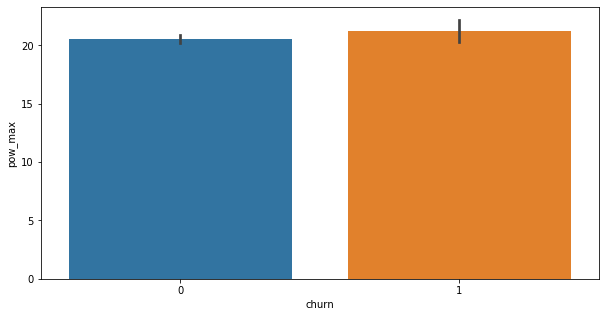

In [132]:
plt.figure(figsize=(10,5))
sns.barplot(data=final,x='churn',y='pow_max');

#### Churned clients have slightly higher mean subscribed power than loyal clients

##### From the scatterplot we can see that most companies with short contract period tend to churn earlier.However, with the long contracts the base yearly bill decreases.

## Categorical Features with Churn Rate

In [133]:
channel_sales = final.groupby([final['channel_sales'],final['churn']])['churn'].count().unstack(level=1).sort_values(by=[0],ascending=False)
channel_sales

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,6455.0,922.0
lmkebamcaaclubfxadlmueccxoimlema,1957.0,116.0
usilxuppasemubllopkaafesmlibmsdf,1294.0,150.0
ewpakwlliwisiwduibdlfmalxowmwpci,884.0,82.0
sddiedcslfslkckwlfkdpoeeailfpeds,12.0,NaN
epumfxlbckeskwekxbiuasklxalciiuu,4.0,NaN
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,NaN


In [134]:
sales_prc =(channel_sales.div(channel_sales.sum(axis=1),axis=0)*100)
sales_prc

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.501694,12.498306
lmkebamcaaclubfxadlmueccxoimlema,94.404245,5.595755
usilxuppasemubllopkaafesmlibmsdf,89.612188,10.387812
ewpakwlliwisiwduibdlfmalxowmwpci,91.511387,8.488613
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,NaN
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,NaN
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,NaN


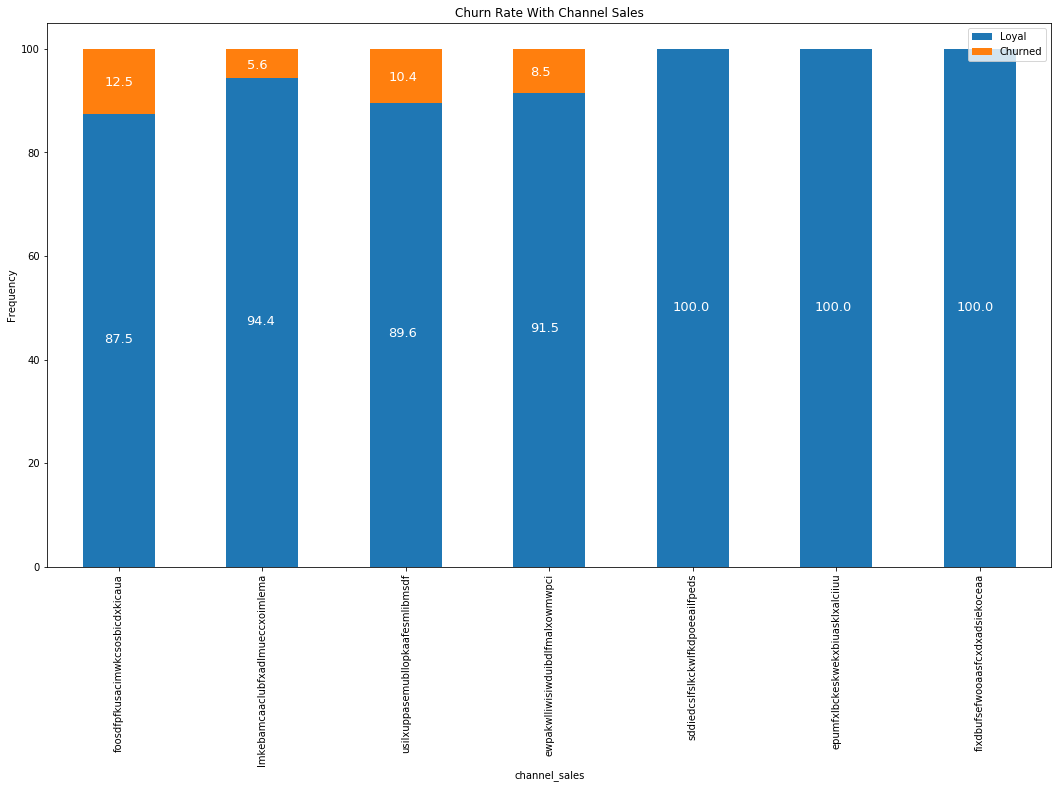

In [135]:
ax = sales_prc.plot(kind='bar',stacked=True,figsize=(18,10))
plt.legend(['Loyal','Churned'])
plt.ylabel('Frequency')
plt.title ('Churn Rate With Channel Sales')
for p in ax.patches:
        values = str(round(p.get_height(),1)) 
        if values == '0.0':
            continue
        ax.annotate(values,((p.get_x() + p.get_width()/2)*0.99-0.1,(p.get_y() + p.get_height()/2)*0.99),color='white',
        size=13)
    

In [136]:
final.head(10
          )

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,date_actv,date_diff,year,month
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025.0,0,359.29,0.095919,0.088347,58.995952,f,831.80,21.09,20.97,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,0,2012-11-07,1460,2016,11
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0.0,0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2013-06-15,1096,2016,6
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0.0,0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2009-08-21,2566,2016,8
3,764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0.0,0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,2010-04-16,2192,2016,4
4,bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0.0,0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,2010-03-30,2192,2016,3
5,568bb38a1afd7c0fc49c77b3789b59a3,sfisfxfcocfpcmckuekokxuseixdaoeu,foosdfpfkusacimwkcsosbicdxkicaua,121335,0,12400,2010-04-08,2016-04-08,2010-04-08,2015-04-12,10865.02,12400.0,0,170.74,0.110083,0.093746,40.606701,f,1052.37,21.09,20.97,1,823.18,6,lxidpiddsbxsbosboudacockeimpuepw,75.000,0,2010-04-08,2192,2016,4
6,149d57cf92fc41cf94415803a877cb4b,NaN,NaN,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526.0,0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,2010-01-13,2245,2016,3
7,1aa498825382410b098937d65c4ec26d,NaN,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,1998.0,0,30.12,0.164775,0.086131,45.308378,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1,2011-12-09,1827,2016,12
8,7ab4bf4878d8f7661dfc20e9b8e18011,sscfoipxikopfskekuobeuxkxmwsuucb,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,0.0,0,0.00,0.166178,0.087538,44.311378,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1,2011-12-02,1827,2016,12
9,01495c955be7ec5e7f3203406785aae0,NaN,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,751.0,0,144.49,0.115174,0.098837,40.606701,f,70.63,53.92,53.92,1,100.09,6,lxidpiddsbxsbosboudacockeimpuepw,26.400,0,2010-04-21,2192,2016,4


In [137]:
origin = final.groupby([final['origin_up'],final['churn']])['origin_up'].count().unstack(level=1)
origin

churn,0,1
origin_up,,
ewxeelcelemmiwuafmddpobolfuxioce,1.0,NaN
kamkkxfxxuwbdslkwifmmcsiusiuosws,4252.0,265.0
ldkssxwpmemidmecebumciepifcamkci,3349.0,315.0
lxidpiddsbxsbosboudacockeimpuepw,6897.0,1015.0
usapbepcfoloekilkwsdiboslwaxobdp,2.0,NaN


In [138]:
tot_origin= origin[0] + origin[1]
origin_prc_churn = origin[1] / tot_origin * 100
origin_prc_churn

origin_up
ewxeelcelemmiwuafmddpobolfuxioce          NaN
kamkkxfxxuwbdslkwifmmcsiusiuosws     5.866726
ldkssxwpmemidmecebumciepifcamkci     8.597162
lxidpiddsbxsbosboudacockeimpuepw    12.828615
usapbepcfoloekilkwsdiboslwaxobdp          NaN
dtype: float64

In [139]:
origin_df = pd.DataFrame({'total no of companies':tot_origin,
                         'churn percentage%':origin_prc_churn})
origin_df

,total no of companies,churn percentage%
origin_up,,
ewxeelcelemmiwuafmddpobolfuxioce,NaN,NaN
kamkkxfxxuwbdslkwifmmcsiusiuosws,4517.0,5.866726
ldkssxwpmemidmecebumciepifcamkci,3664.0,8.597162
lxidpiddsbxsbosboudacockeimpuepw,7912.0,12.828615
usapbepcfoloekilkwsdiboslwaxobdp,NaN,NaN


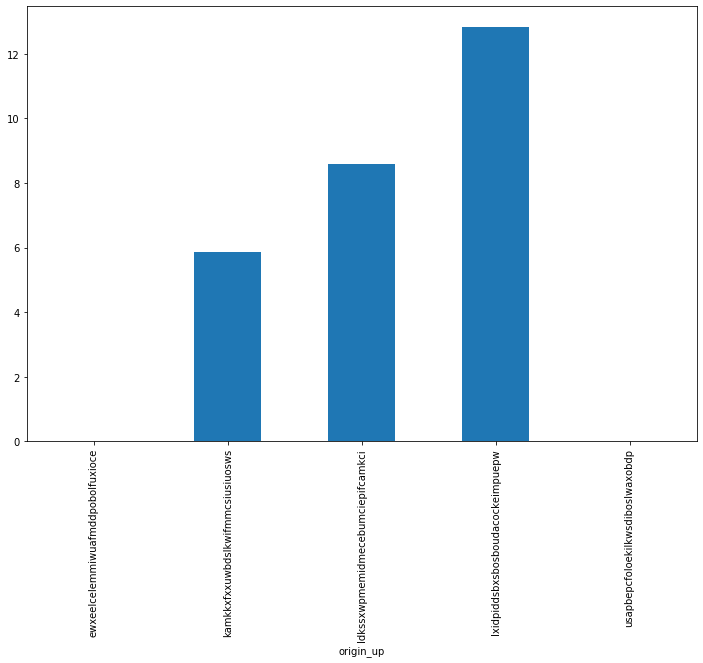

In [140]:
origin_prc_churn.plot(kind='bar',stacked=True,figsize=(12,8));

## History Data 

In [141]:
hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [142]:
missing_val = hist.isnull().sum() / hist.shape[0]

In [143]:
missing_df=pd.DataFrame({'missing Values%':missing_val})

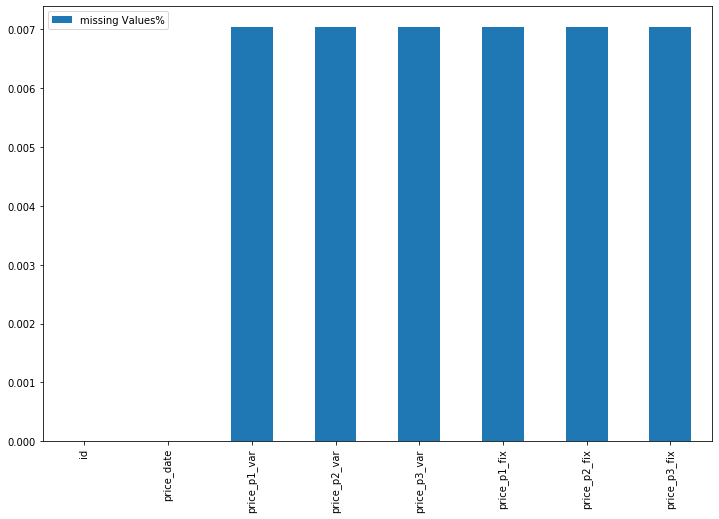

In [144]:
missing_df.plot(kind='bar',figsize=(12,8));

#### The missing values are too few so we can replace them by mean or median 

In [145]:
hist.loc[hist['price_p1_var'].isnull(),'price_p1_var'] = hist['price_p1_var'].median()

In [146]:

hist[hist['price_p1_var'] < 0 ]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix


In [147]:
# checking for negative values 
print(hist[hist['price_p1_fix'] < 0 ])
print(hist[hist['price_p2_fix'] < 0 ])
print(hist[hist['price_p3_fix'] < 0 ])

                                      id  price_date  price_p1_var  \
23138   951d99fe07ca94c2139f43bc37095139  2015-03-01      0.125976   
28350   f7bdc6fa1067cd26fd80bfb9f3fca28f  2015-03-01      0.131032   
98575   9b523ad5ba8aa2e524dcda5b3d54dab2  2015-02-01      0.129444   
113467  cfd098ee6c567eb32374c77d20571bc7  2015-02-01      0.123086   
118467  51d7d8a0bf6b8bd94f8c1de7942c66ea  2015-07-01      0.128132   
125819  decc0a647016e183ded972595cd2b9fb  2015-03-01      0.124937   
128761  cc214d7c05de3ee17a7691e274ac488e  2015-06-01      0.124675   
141011  2a4ed325054472e03cdcc9a34693be4b  2015-02-01      0.167317   
160827  395a6f41bbd1a0f23a64f00645264e78  2015-04-01      0.121352   
181811  d4a84ff4ec620151ef05bdef0cf27eab  2015-05-01      0.125976   

        price_p2_var  price_p3_var  price_p1_fix  price_p2_fix  price_p3_fix  
23138       0.103395      0.071536     -0.162916     -0.097749     -0.065166  
28350       0.108896      0.076955     -0.162916     -0.097749     -0.0

In [148]:
hist[hist['price_p1_var'] < 0 ]
hist[hist['price_p2_var'] < 0 ]
hist[hist['price_p3_var'] < 0 ]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix


In [149]:
# Removing Negative value first before filling misiing values 
hist.loc[hist['price_p1_fix'] < 0, 'price_p1_fix'] = hist['price_p1_fix'].median()
hist.loc[hist['price_p2_fix'] < 0, 'price_p2_fix'] = hist['price_p2_fix'].median()
hist.loc[hist['price_p3_fix'] < 0, 'price_p3_fix'] = hist['price_p3_fix'].median()

In [150]:
# Filling Missing Values 
hist.loc[hist['price_p1_var'].isnull(),'price_p1_var'] = hist['price_p1_var'].median()
hist.loc[hist['price_p2_var'].isnull(),'price_p2_var'] = hist['price_p2_var'].median()
hist.loc[hist['price_p3_var'].isnull(),'price_p3_var'] = hist['price_p3_var'].median()
hist.loc[hist['price_p1_fix'].isnull(),'price_p1_fix'] = hist['price_p1_fix'].median()
hist.loc[hist['price_p2_fix'].isnull(),'price_p2_fix'] = hist['price_p2_fix'].median()
hist.loc[hist['price_p3_fix'].isnull(),'price_p3_fix'] = hist['price_p3_fix'].median()

In [151]:
hist.head(1)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [152]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  193002 non-null  float64
 3   price_p2_var  193002 non-null  float64
 4   price_p3_var  193002 non-null  float64
 5   price_p1_fix  193002 non-null  float64
 6   price_p2_fix  193002 non-null  float64
 7   price_p3_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [153]:
# Converting date column to datetime format
hist['price_date'] = pd.to_datetime(hist['price_date'],format='%Y-%m-%d')

## Feature Engineering


In [154]:
hist['years'] = pd.DatetimeIndex(hist['price_date']).year
hist['month'] = pd.DatetimeIndex(hist['price_date']).month

In [155]:
hist.head(2)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,years,month
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,2015,1
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,2015,2


## Visualization

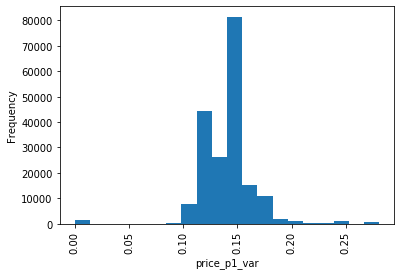

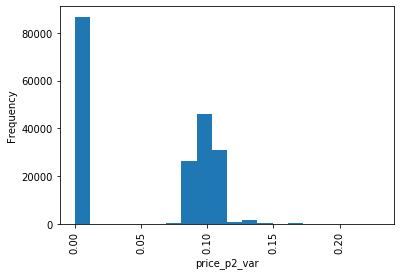

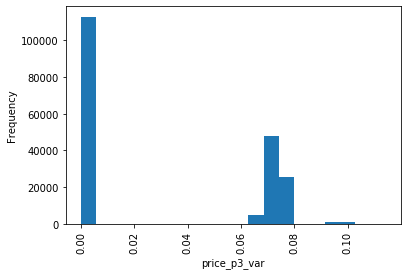

In [205]:
# plotting variable price for 3 periods

plot_hist(hist,'price_p1_var',20,ax[0])
plot_hist(hist,'price_p2_var',20,ax[1])
plot_hist(hist,'price_p3_var',20,ax[2])


##### Obviously the highest variable price range falls in the first period followed by the second and third period comes last 

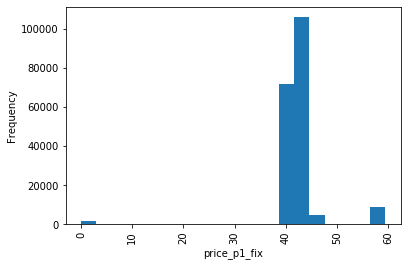

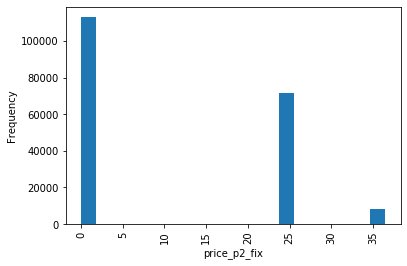

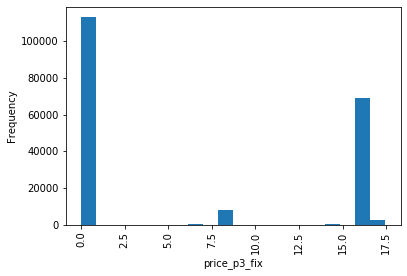

In [204]:
# plotting fixed prices in the 3 periods 

plot_hist(hist,'price_p1_fix',20,ax=ax[0])
plot_hist(hist,'price_p2_fix',20,ax=ax[1])
plot_hist(hist,'price_p3_fix',20,ax=ax[2])

##### We can see that also the fix price in the first period has the highest price ranges among second and third 

# Conclusion 

> Only 10 % of the dataset are churned clients.
> We have discovered that churned clients have the highest electricity consumption in January and the loyal clients in April
> For Gas consumption churned clients have the highest in March and loyal clients in April.
> The highest churn rate in 2016 was in Feb, Mar, June & Nov.
> The highest electricity consumption rate for loyal clients is in May with the least in September, while for churned the highest is in January.
> We saw that the price energy for the first period of churned clients is higher than the price range for the same period for loyal clients and the range for both in the second period
> Around 15 % of the total clients number are Gas clients.
> 8 % of the gas clients are churned the rest are loyal 
> 10 % of Non_Gas clients are churned 
> We observed that the higher the contract period the less probability of the client to churn.

> We found that May and July have the highest electrical consumption in 2016
> May and November has the highest gas consumption 
> Churned Companies consumed the most at January
> Most churned clients have churned in January and February 
> Most of Gas clients churned in Febeuary and April
> February has the highest price in the first period & second period, and we got that gas and non gas companies highest churn rate was January and February 
> from the above barplot we can see that loyal companies have higher mean contract period  than churned clients
> loyal Gas clients have slightly highest contract duration than non-gas clients.
> churned gas clients have lowest contract duration than non-gas clients


In [208]:
# Saving our dataset for the next use 
pickle.dump(final,open('final.pickle','wb'))
pickle.dump(hist,open('hist.pickle','wb'))